# Beef prices

https://data.cso.ie/table/AJM01

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
from pandas.tseries.offsets import MonthEnd


# user defined - see utils.py
from utils import snake_case_columns, beef_price_lineplot, cso_date_to_datetime

In [2]:
df_beef = pd.read_csv("data/ie/beef_prices_1976-2022_cso.csv")

In [3]:
# value is: Cattle Price per 100 Kg (Euro)
df_beef.head()

,Statistic,Month,Type of Cattle,UNIT,VALUE
0,Cattle Price per 100 Kg,1976M01,Bullocks 200-249kg,Euro,NaN
1,Cattle Price per 100 Kg,1976M01,Bullocks 250-299kg,Euro,NaN
2,Cattle Price per 100 Kg,1976M01,Bullocks 300-349kg,Euro,67.88
3,Cattle Price per 100 Kg,1976M01,Bullocks 350-399kg,Euro,72.34
4,Cattle Price per 100 Kg,1976M01,Bullocks 400-449kg,Euro,71.49


In [4]:
df_beef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7756 entries, 0 to 7755
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Statistic       7756 non-null   object
 1   Month           7756 non-null   object
 2   Type of Cattle  7756 non-null   object
 3   UNIT            7756 non-null   object
 4   VALUE           7561 non-null   object
dtypes: object(5)
memory usage: 303.1+ KB


In [5]:
snake_case_columns(df_beef)

In [6]:
cso_date_to_datetime(df_beef, "month")

In [7]:
df_beef = df_beef[df_beef["month"].dt.year > 1998]

In [8]:
df_beef["type_of_cattle"].unique()

array(['Bullocks 200-249kg', 'Bullocks 250-299kg', 'Bullocks 300-349kg',
       'Bullocks 350-399kg', 'Bullocks 400-449kg', 'Bullocks 450-499kg',
       'Bullocks 500-549kg', 'Bullocks 550kg+', 'Heifers 200-249kg',
       'Heifers 250-299kg', 'Heifers 300-349kg', 'Heifers 350-399kg',
       'Heifers 400-449kg', 'Cows for slaughter'], dtype=object)

In [9]:
df_beef = df_beef[df_beef["type_of_cattle"]!="Cows for slaughter"]

In [10]:
df_beef = df_beef.astype(dtype= {"value":"float64"})

In [11]:
df_beef.head()

,statistic,month,type_of_cattle,unit,value
3864,Cattle Price per 100 Kg,1999-01-31,Bullocks 200-249kg,Euro,136.83
3865,Cattle Price per 100 Kg,1999-01-31,Bullocks 250-299kg,Euro,139.73
3866,Cattle Price per 100 Kg,1999-01-31,Bullocks 300-349kg,Euro,133.33
3867,Cattle Price per 100 Kg,1999-01-31,Bullocks 350-399kg,Euro,131.07
3868,Cattle Price per 100 Kg,1999-01-31,Bullocks 400-449kg,Euro,127.16


In [12]:
df_beef.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3614 entries, 3864 to 7754
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   statistic       3614 non-null   object        
 1   month           3614 non-null   datetime64[ns]
 2   type_of_cattle  3614 non-null   object        
 3   unit            3614 non-null   object        
 4   value           3562 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 169.4+ KB


In [13]:
df_beef.groupby(['type_of_cattle']).count()

,statistic,month,unit,value
type_of_cattle,,,,
Bullocks 200-249kg,278,278,278,274
Bullocks 250-299kg,278,278,278,274
Bullocks 300-349kg,278,278,278,274
Bullocks 350-399kg,278,278,278,274
Bullocks 400-449kg,278,278,278,274
Bullocks 450-499kg,278,278,278,274
Bullocks 500-549kg,278,278,278,274
Bullocks 550kg+,278,278,278,274
Heifers 200-249kg,278,278,278,274


In [14]:
df_beef.isnull().any()

statistic         False
month             False
type_of_cattle    False
unit              False
value              True
dtype: bool

In [15]:
# https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe
df_beef_na = df_beef[df_beef.isna().any(axis=1)]
print(df_beef_na.count())
#df_beef_na

statistic         52
month             52
type_of_cattle    52
unit              52
value              0
dtype: int64


In [16]:
# forward fill missing values as there is only 52

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
cattle_types = df_beef["type_of_cattle"].unique()
for cattle_type in cattle_types:
    df_beef_by_cattle_type = df_beef[df_beef["type_of_cattle"] == cattle_type]
    df_beef_by_cattle_type = df_beef_by_cattle_type.fillna(method="ffill")
    df_beef[df_beef["type_of_cattle"] == cattle_type] = df_beef_by_cattle_type

In [17]:
df_beef.groupby(['type_of_cattle']).count()

,statistic,month,unit,value
type_of_cattle,,,,
Bullocks 200-249kg,278,278,278,278
Bullocks 250-299kg,278,278,278,278
Bullocks 300-349kg,278,278,278,278
Bullocks 350-399kg,278,278,278,278
Bullocks 400-449kg,278,278,278,278
Bullocks 450-499kg,278,278,278,278
Bullocks 500-549kg,278,278,278,278
Bullocks 550kg+,278,278,278,278
Heifers 200-249kg,278,278,278,278


In [18]:
# https://stackoverflow.com/questions/17957890/pandas-select-from-dataframe-using-startswith
df_bullocks = df_beef[df_beef["type_of_cattle"].str.startswith('Bullocks')]

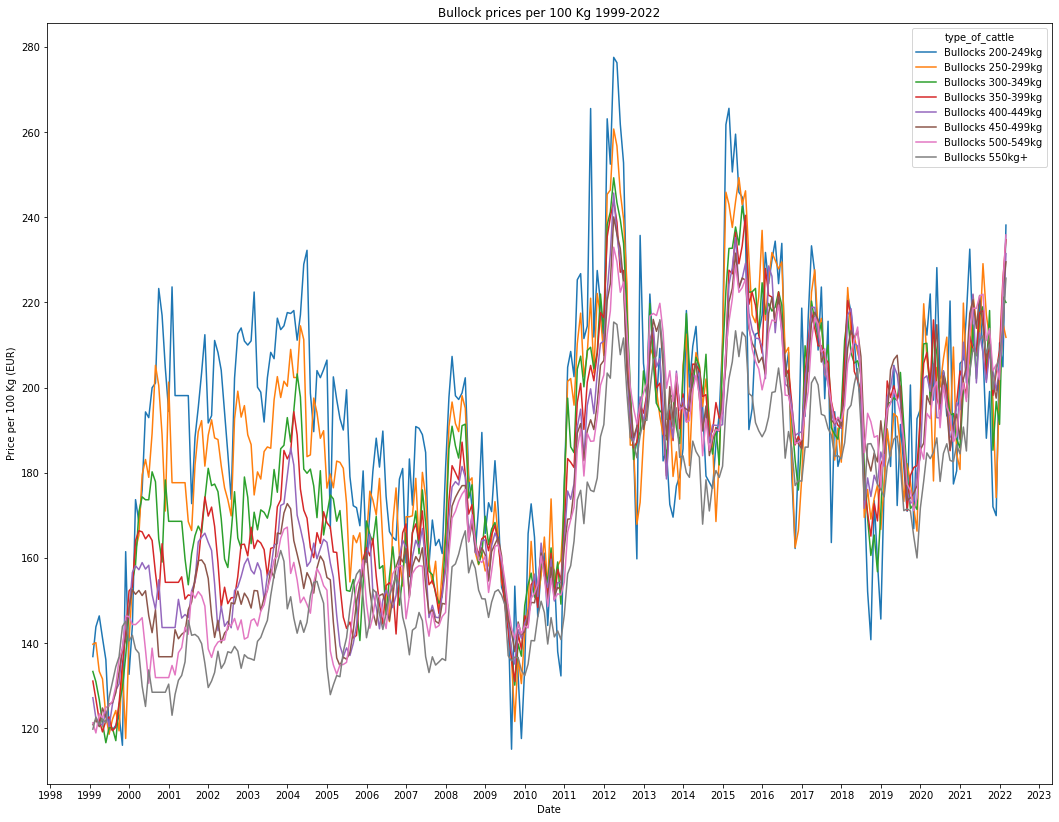

In [19]:
beef_price_lineplot('Bullock prices per 100 Kg 1999-2022', df_bullocks)

In [20]:
df_heifers = df_beef[df_beef["type_of_cattle"].str.startswith('Heifer')]

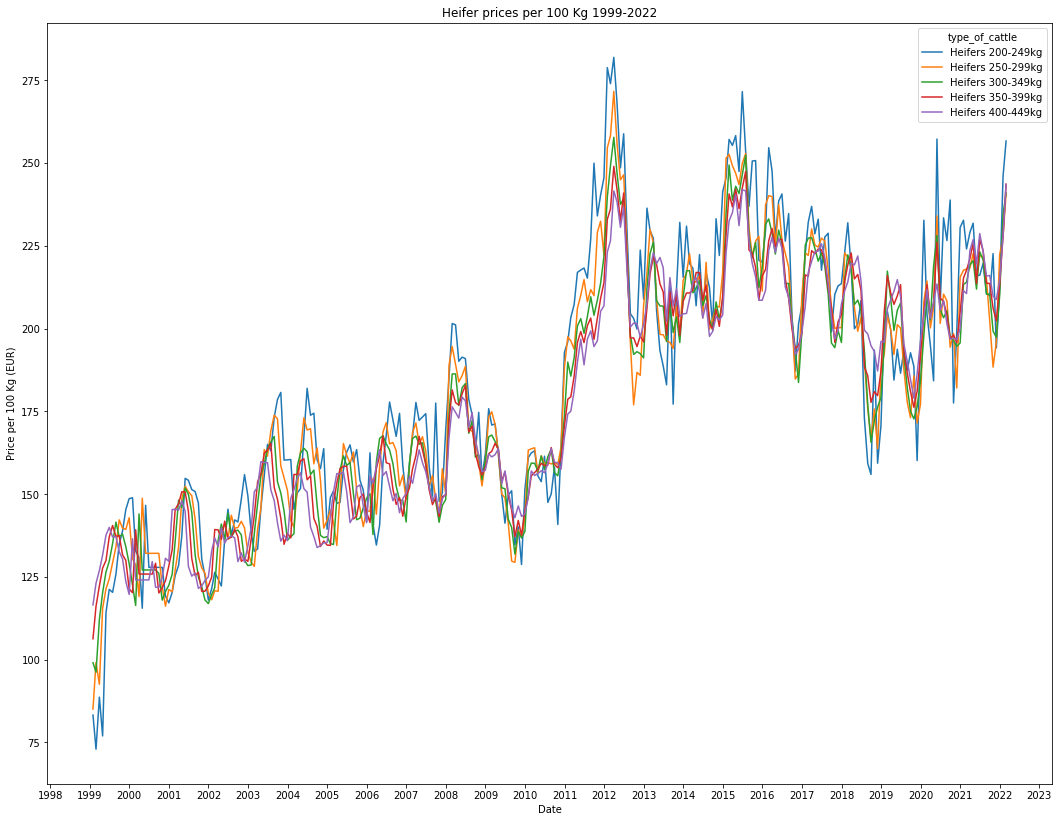

In [21]:
beef_price_lineplot('Heifer prices per 100 Kg 1999-2022', df_heifers)

In [22]:
df_beef.shape

(3614, 5)

In [23]:
df_beef = df_beef.drop(["statistic", "unit"], axis=1)

In [24]:
df_beef_2 = df_beef.pivot(index='month', columns='type_of_cattle', values='value')

In [25]:
snake_case_columns(df_beef_2)

In [26]:
df_beef_2['target_cattle'] = df_beef_2.mean(axis=1)

## final output

In [27]:
df_beef_2

,bullocks_200-249kg,bullocks_250-299kg,bullocks_300-349kg,bullocks_350-399kg,bullocks_400-449kg,bullocks_450-499kg,bullocks_500-549kg,bullocks_550kg+,heifers_200-249kg,heifers_250-299kg,heifers_300-349kg,heifers_350-399kg,heifers_400-449kg,target_cattle
month,,,,,,,,,,,,,,
1999-01-31,136.83,139.73,133.33,131.07,127.16,120.83,121.28,119.78,83.25,85.06,99.08,106.29,116.52,116.939231
1999-02-28,143.80,140.10,130.93,126.85,122.36,121.99,118.89,122.60,72.94,99.15,96.20,116.09,123.06,118.073846
1999-03-31,146.38,133.37,126.74,121.88,121.34,120.37,123.38,120.78,88.66,92.56,112.14,122.24,126.91,119.750000
1999-04-30,141.20,131.58,121.23,119.14,120.69,124.75,122.41,122.15,76.94,115.50,120.22,127.67,131.58,121.158462
1999-05-31,136.09,122.94,116.59,121.77,123.92,122.61,124.88,121.30,114.15,121.35,126.47,129.93,137.58,124.583077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,172.03,196.88,185.30,198.15,203.87,201.15,203.94,199.58,222.61,188.35,199.21,206.13,209.76,198.996923
2021-11-30,169.93,174.18,196.74,203.66,199.36,197.53,205.40,204.63,194.16,195.85,197.39,202.34,208.77,196.149231
2021-12-31,210.53,200.10,191.37,208.82,204.46,203.70,201.86,207.42,211.98,222.36,210.04,213.25,214.67,207.735385


# AGRICULTURAL PRICE INDICES

https://www.cso.ie/en/methods/agricultureandfishing/agriculturalpriceindices/methodology-agriculturalpriceindices/#:~:text=The%20Output%20Price%20Index%20is,of%20the%20average%20farm%20concept

"The Output Price Index is based on the sales of agricultural products and the Input Price Index is based on the purchases of the means of agricultural production by agricultural producers. Both indices are compiled on the basis of the average farm concept. The average farm concept includes both sales to other economic sectors as well as sales/purchases of agricultural output between agricultural units for intermediate consumption purposes, excluding trade in animals between agricultural units."

## df_agri_price_2010

In [28]:
df_agri_price_2010 = pd.read_csv("data/ie/agri_price_index/AHM01_1995M01-2010M12.csv")

In [29]:
snake_case_columns(df_agri_price_2010)

In [30]:
df_agri_price_2010.head()

,statistic,month,agricultural_product,unit,value
0,Agricultural Input and Output Prices Indices,1995M01,Total Index (Output),Base 2000=100,108.3
1,Agricultural Input and Output Prices Indices,1995M01,Total Livestock and Livestock Products (Output),Base 2000=100,108.9
2,Agricultural Input and Output Prices Indices,1995M01,Total Livestock Products (Output),Base 2000=100,102.9
3,Agricultural Input and Output Prices Indices,1995M01,Milk (Output),Base 2000=100,102.6
4,Agricultural Input and Output Prices Indices,1995M01,Total Livestock (Output),Base 2000=100,113.4


In [31]:
df_agri_price_2010.statistic.unique()

array(['Agricultural Input and Output Prices Indices'], dtype=object)

In [32]:
df_agri_price_2010.unit.unique()

array(['Base 2000=100'], dtype=object)

In [33]:
sorted(df_agri_price_2010.agricultural_product.unique())

['All Energy (Input)',
 'All Feeding Stuffs',
 'All Fertilisers  (Input)',
 'Cereals (Output)',
 'Compound Feeding Stuffs - Calf (Input)',
 'Compound Feeding Stuffs - Cattle (Input)',
 'Compound Feeding Stuffs - Pig (Input)',
 'Compound Feeding Stuffs - Poultry (Input)',
 'Compound Fertilisers - N.P.K. (Input)',
 'Compound Fertilisers - P.K. (Input)',
 'Cows for Slaughter (Output)',
 'Energy - Electricity  (Input)',
 'Energy - Motor Fuels  (Input)',
 'Finished Cattle (Output)',
 'Milk (Output)',
 'Other Products  (Input)',
 'Pigs (Output)',
 'Plant Protection Products (Input)',
 'Potatoes (Output)',
 'Poultry (Output)',
 'Seeds  (Input)',
 'Sheep (Output)',
 'Store Cattle (Output)',
 'Straight Feeding Stuffs (Input)',
 'Straight Fertilisers  (Input)',
 'Sugarbeet (Output)',
 'Total Cattle (Output)',
 'Total Crop Products (Output)',
 'Total Index (Input)',
 'Total Index (Output)',
 'Total Livestock (Output)',
 'Total Livestock Products (Output)',
 'Total Livestock and Livestock Products

In [34]:
df_agri_price_2010 = df_agri_price_2010.drop(["statistic", "unit"], axis=1)

In [35]:
cso_date_to_datetime(df_agri_price_2010, "month")

In [36]:
df_agri_price_2010

,month,agricultural_product,value
0,1995-01-31,Total Index (Output),108.300
1,1995-01-31,Total Livestock and Livestock Products (Output),108.900
2,1995-01-31,Total Livestock Products (Output),102.900
3,1995-01-31,Milk (Output),102.600
4,1995-01-31,Total Livestock (Output),113.400
...,...,...,...
6715,2010-12-31,Energy - Electricity (Input),156.855
6716,2010-12-31,Other Products (Input),136.874
6717,2010-12-31,Seeds (Input),123.130
6718,2010-12-31,Plant Protection Products (Input),104.879


In [37]:
# https://pandas.pydata.org/docs/reference/api/pandas.pivot.html
df_agri_price_2010_2 = df_agri_price_2010.pivot(index='month', columns='agricultural_product', values='value')

In [38]:
snake_case_columns(df_agri_price_2010_2)

In [39]:
import re
# https://stackoverflow.com/questions/16720541/python-string-replace-regular-expression
df_agri_price_2010_2.columns = map(lambda x : re.sub(r"[()]", "", x), df_agri_price_2010_2.columns)

In [40]:
df_agri_price_2010_2 = df_agri_price_2010_2[df_agri_price_2010_2.index.year > 1998]

In [41]:
df_agri_price_2010_2

,all_energy_input,all_feeding_stuffs,all_fertilisers__input,cereals_output,compound_feeding_stuffs_-_calf_input,compound_feeding_stuffs_-_cattle_input,compound_feeding_stuffs_-_pig_input,compound_feeding_stuffs_-_poultry_input,compound_fertilisers_-_n.p.k._input,compound_fertilisers_-_p.k._input,...,sugarbeet_output,total_cattle_output,total_crop_products_output,total_index_input,total_index_output,total_livestock_output,total_livestock_products_output,total_livestock_and_livestock_products_output,vegetables_output,veterinary_expenses_including_a.i._input
month,,,,,,,,,,,,,,,,,,,,,
1999-01-31,72.800,97.000,93.600,99.000,97.600,96.200,96.900,98.600,94.600,95.400,...,98.6,82.800,110.300,92.400,93.200,80.800,103.900,90.800,99.30,95.000
1999-02-28,73.400,97.100,94.300,99.000,98.700,96.500,97.900,98.500,95.200,96.400,...,98.6,84.000,111.000,92.800,93.600,83.100,101.900,91.200,100.40,95.100
1999-03-31,74.500,97.400,94.200,99.000,98.700,96.700,97.400,98.900,95.200,96.400,...,98.6,89.400,110.700,93.200,95.400,88.700,99.200,93.200,100.10,95.600
1999-04-30,77.100,97.500,93.600,99.000,98.200,96.300,98.300,99.100,94.700,96.300,...,98.6,92.800,108.300,93.600,95.600,91.300,97.200,93.800,96.70,96.100
1999-05-31,78.000,97.600,93.600,99.000,98.200,96.700,98.900,98.800,94.800,96.400,...,98.6,91.900,107.000,94.000,95.900,92.300,97.000,94.300,98.10,96.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-08-31,164.687,126.179,159.859,150.229,123.664,124.960,123.157,130.879,163.765,184.960,...,NaN,119.493,131.110,139.529,115.096,120.244,101.422,112.440,131.28,131.012
2010-09-30,166.558,133.245,164.611,150.229,131.305,131.431,132.508,136.727,168.238,189.341,...,NaN,115.899,139.699,143.216,115.678,116.916,104.321,111.694,128.16,131.012
2010-10-31,165.360,133.963,165.346,150.229,130.620,131.441,136.609,136.106,168.808,189.855,...,NaN,114.611,135.133,143.433,114.294,115.336,104.486,110.838,128.33,130.969


In [42]:
df_agri_price_2010_2.isnull().any()

all_energy_input                                 False
all_feeding_stuffs                               False
all_fertilisers__input                           False
cereals_output                                   False
compound_feeding_stuffs_-_calf_input             False
compound_feeding_stuffs_-_cattle_input           False
compound_feeding_stuffs_-_pig_input              False
compound_feeding_stuffs_-_poultry_input          False
compound_fertilisers_-_n.p.k._input              False
compound_fertilisers_-_p.k._input                False
cows_for_slaughter_output                        False
energy_-_electricity__input                      False
energy_-_motor_fuels__input                      False
finished_cattle_output                           False
milk_output                                      False
other_products__input                            False
pigs_output                                      False
plant_protection_products_input                  False
potatoes_o

In [43]:
df_agri_price_2010_2.sugarbeet_output.isna().sum()

52

In [44]:
df_agri_price_2010_2.sugarbeet_output.isna().count()

144

In [45]:
df_agri_price_2010_2 = df_agri_price_2010_2.drop(["sugarbeet_output"], axis=1)

In [46]:
df_agri_price_2010_2[df_agri_price_2010_2.index.year == 2000]

,all_energy_input,all_feeding_stuffs,all_fertilisers__input,cereals_output,compound_feeding_stuffs_-_calf_input,compound_feeding_stuffs_-_cattle_input,compound_feeding_stuffs_-_pig_input,compound_feeding_stuffs_-_poultry_input,compound_fertilisers_-_n.p.k._input,compound_fertilisers_-_p.k._input,...,straight_fertilisers__input,total_cattle_output,total_crop_products_output,total_index_input,total_index_output,total_livestock_output,total_livestock_products_output,total_livestock_and_livestock_products_output,vegetables_output,veterinary_expenses_including_a.i._input
month,,,,,,,,,,,,,,,,,,,,,
2000-01-31,90.671,98.132,95.772,104.686,98.131,98.460,98.102,97.641,96.258,97.433,...,94.234,92.359,95.665,96.560,95.376,92.159,99.804,95.328,96.39,98.920
2000-02-29,92.235,98.808,96.973,104.686,98.914,98.948,98.929,98.833,97.511,97.907,...,95.590,95.002,96.058,97.403,97.136,96.342,98.689,97.315,98.37,99.088
2000-03-31,95.814,98.899,97.115,104.686,98.738,99.054,99.040,98.894,97.779,97.919,...,95.560,96.261,95.522,98.160,98.034,98.852,97.885,98.451,98.08,99.350
2000-04-30,95.582,98.877,97.569,104.686,98.969,98.919,99.040,98.857,98.027,98.074,...,96.445,98.964,95.913,98.319,99.043,101.504,96.820,99.562,98.31,100.242
2000-05-31,93.856,98.642,98.531,104.686,99.258,98.404,99.119,97.749,98.897,98.356,...,97.761,103.868,101.333,98.050,101.089,103.644,97.383,101.048,101.52,100.244
2000-06-30,97.831,99.524,99.180,104.686,100.096,98.933,99.891,99.924,99.271,98.624,...,98.990,108.912,103.091,99.225,103.032,106.603,97.967,103.022,101.08,100.186
2000-07-31,100.013,99.792,98.883,104.686,100.096,99.670,100.147,99.293,99.128,98.423,...,98.391,106.158,104.172,99.727,102.304,103.891,99.316,101.994,101.57,100.254
2000-08-31,99.964,100.626,98.994,100.000,101.507,100.470,100.425,100.978,99.078,99.255,...,98.695,105.497,97.380,100.213,101.321,102.997,100.530,101.975,103.69,100.363
2000-09-30,108.801,100.619,99.024,99.999,100.500,100.233,100.812,101.265,99.008,100.071,...,98.801,105.144,107.685,101.896,103.570,102.905,102.862,102.887,102.02,100.323


In [47]:
df_agri_price_2010_2[df_agri_price_2010_2.index.year == 2010]

,all_energy_input,all_feeding_stuffs,all_fertilisers__input,cereals_output,compound_feeding_stuffs_-_calf_input,compound_feeding_stuffs_-_cattle_input,compound_feeding_stuffs_-_pig_input,compound_feeding_stuffs_-_poultry_input,compound_fertilisers_-_n.p.k._input,compound_fertilisers_-_p.k._input,...,straight_fertilisers__input,total_cattle_output,total_crop_products_output,total_index_input,total_index_output,total_livestock_output,total_livestock_products_output,total_livestock_and_livestock_products_output,vegetables_output,veterinary_expenses_including_a.i._input
month,,,,,,,,,,,,,,,,,,,,,
2010-01-31,156.234,121.860,160.350,94.623,118.365,117.838,120.293,131.140,164.793,241.160,...,148.168,112.559,133.596,136.544,108.211,113.541,90.529,104.000,136.78,131.806
2010-02-28,155.834,121.708,158.551,94.623,118.906,117.491,120.293,131.104,162.921,202.852,...,150.707,112.894,131.171,136.237,108.446,114.444,90.886,104.677,131.24,131.815
2010-03-31,163.002,121.599,161.613,94.623,119.267,117.446,120.293,130.889,164.721,193.976,...,157.618,113.695,131.875,137.838,110.022,116.042,92.779,106.397,132.93,130.963
2010-04-30,163.541,121.703,162.047,94.623,119.555,117.566,120.293,130.889,164.991,184.178,...,159.570,115.201,133.726,138.032,111.790,118.412,93.664,108.151,135.37,130.996
2010-05-31,167.597,121.626,161.690,94.623,119.555,117.566,120.293,130.420,164.912,184.178,...,158.670,118.160,132.365,138.643,115.463,120.931,100.980,112.659,132.02,130.996
2010-06-30,167.328,121.636,158.733,94.623,119.843,117.604,120.293,130.482,162.517,184.178,...,154.067,120.148,129.679,138.112,115.396,121.453,101.130,113.027,124.36,130.996
2010-07-31,165.335,121.884,158.279,94.623,120.564,118.065,120.293,130.482,162.043,184.178,...,153.856,117.434,124.578,137.810,113.240,118.659,101.054,111.360,133.73,131.012
2010-08-31,164.687,126.179,159.859,150.229,123.664,124.960,123.157,130.879,163.765,184.960,...,155.503,119.493,131.110,139.529,115.096,120.244,101.422,112.440,131.28,131.012
2010-09-30,166.558,133.245,164.611,150.229,131.305,131.431,132.508,136.727,168.238,189.341,...,161.373,115.899,139.699,143.216,115.678,116.916,104.321,111.694,128.16,131.012


In [48]:
# this data is based at 2000, we want to rebase it to 2010 so we can join it with the next dataset / time series for
# agricultural prices indices

# https://stats.stackexchange.com/questions/154577/how-to-work-with-index-numbers#:~:text=Rebasing%20an%20index,multiplying%20the%20result%20by%20100.
df_agri_price_2010_2_rebased = df_agri_price_2010_2 /df_agri_price_2010_2[df_agri_price_2010_2.index.year == 2010].mean() * 100

In [49]:
df_agri_price_2010_2_rebased.shape

(144, 34)

In [50]:
df_agri_price_2010_2_rebased.isnull().sum()

all_energy_input                                 0
all_feeding_stuffs                               0
all_fertilisers__input                           0
cereals_output                                   0
compound_feeding_stuffs_-_calf_input             0
compound_feeding_stuffs_-_cattle_input           0
compound_feeding_stuffs_-_pig_input              0
compound_feeding_stuffs_-_poultry_input          0
compound_fertilisers_-_n.p.k._input              0
compound_fertilisers_-_p.k._input                0
cows_for_slaughter_output                        0
energy_-_electricity__input                      0
energy_-_motor_fuels__input                      0
finished_cattle_output                           0
milk_output                                      0
other_products__input                            0
pigs_output                                      0
plant_protection_products_input                  0
potatoes_output                                  0
poultry_output                 

### intermediate output

In [51]:
df_agri_price_2010_2_rebased

,all_energy_input,all_feeding_stuffs,all_fertilisers__input,cereals_output,compound_feeding_stuffs_-_calf_input,compound_feeding_stuffs_-_cattle_input,compound_feeding_stuffs_-_pig_input,compound_feeding_stuffs_-_poultry_input,compound_fertilisers_-_n.p.k._input,compound_fertilisers_-_p.k._input,...,straight_fertilisers__input,total_cattle_output,total_crop_products_output,total_index_input,total_index_output,total_livestock_output,total_livestock_products_output,total_livestock_and_livestock_products_output,vegetables_output,veterinary_expenses_including_a.i._input
month,,,,,,,,,,,,,,,,,,,,,
1999-01-31,44.209967,76.889591,57.711872,84.046336,79.104242,78.247007,77.132128,74.338418,57.069775,49.371386,...,57.605202,71.091217,83.143524,66.049498,82.166178,68.447120,104.724531,82.366930,75.826609,72.456675
1999-02-28,44.574335,76.968859,58.143478,84.046336,79.995785,78.491020,77.928125,74.263024,57.431739,49.888906,...,58.112178,72.121525,83.671180,66.335426,82.518822,70.395491,102.708660,82.729780,76.666582,72.532946
1999-03-31,45.242343,77.206662,58.081820,84.046336,79.995785,78.653696,77.530127,74.564600,57.431739,49.888906,...,57.985434,76.757909,83.445041,66.621355,84.105723,75.139351,99.987233,84.544030,76.437498,72.914296
1999-04-30,46.821270,77.285930,57.711872,84.046336,79.590538,78.328345,78.246524,74.715388,57.130102,49.837154,...,57.415085,79.677113,81.635935,66.907283,84.282045,77.341857,97.971361,85.088305,73.841220,73.295647
1999-05-31,47.367822,77.365197,57.711872,84.046336,79.590538,78.653696,78.724123,74.489206,57.190430,49.888906,...,57.288341,78.904382,80.656002,67.193212,84.546529,78.188975,97.769774,85.541867,74.910276,73.295647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-08-31,100.011083,100.019090,98.565835,127.537343,100.228965,101.639771,98.032627,98.674826,98.795261,95.720457,...,98.545453,102.595445,98.829985,99.738316,101.469940,101.860835,102.226866,101.997111,100.246901,99.923094
2010-09-30,101.147303,105.620140,101.495823,127.537343,106.421951,106.903143,105.475996,103.083863,101.493708,97.987711,...,102.265393,99.509674,105.304326,102.373862,101.983038,99.041627,105.148872,101.320396,97.864434,99.923094
2010-10-31,100.419782,106.189282,101.949009,127.537343,105.866763,106.911277,108.740381,102.615667,101.837574,98.253716,...,102.977695,98.403810,101.862500,102.528979,100.762888,97.703181,105.315182,100.543897,97.994247,99.890298


## df_agri_price_2018

In [52]:
df_agri_price_2018 = pd.read_csv("data/ie/agri_price_index/AHM03_2005M01-2018M01.csv")

In [53]:
df_agri_price_2018

,Statistic,Month,Agricultural Product,UNIT,VALUE
0,Agricultural Input and Output Price Indices,2005M01,Agricultural output price index,Base 2010 = 100,94.450
1,Agricultural Input and Output Price Indices,2005M01,Crop output,Base 2010 = 100,79.430
2,Agricultural Input and Output Price Indices,2005M01,Cereals including seeds,Base 2010 = 100,81.500
3,Agricultural Input and Output Price Indices,2005M01,Vegetables,Base 2010 = 100,93.030
4,Agricultural Input and Output Price Indices,2005M01,Potatoes including seeds,Base 2010 = 100,55.920
...,...,...,...,...,...
6432,Agricultural Input and Output Price Indices,2018M01,Compound feeding stuffs for pigs,Base 2010 = 100,124.032
6433,Agricultural Input and Output Price Indices,2018M01,Compound feeding stuffs for poultry,Base 2010 = 100,113.220
6434,Agricultural Input and Output Price Indices,2018M01,Other compound feeding stuffs,Base 2010 = 100,111.416
6435,Agricultural Input and Output Price Indices,2018M01,Maintenance of materials and buildings,Base 2010 = 100,99.157


In [54]:
snake_case_columns(df_agri_price_2018)

In [55]:
df_agri_price_2018.statistic.unique()

array(['Agricultural Input and Output Price Indices'], dtype=object)

In [56]:
df_agri_price_2018.unit.unique()

array(['Base 2010 = 100'], dtype=object)

In [57]:
sorted(df_agri_price_2018.agricultural_product.unique())

['Agricultural input price index',
 'Agricultural output price index',
 'Animal output',
 'Animal products',
 'Animals',
 'Calves',
 'Cattle',
 'Cattle excluding calves',
 'Cereals including seeds',
 'Compound feeding stuffs',
 'Compound feeding stuffs for calves',
 'Compound feeding stuffs for cattle excluding calves',
 'Compound feeding stuffs for pigs',
 'Compound feeding stuffs for poultry',
 'Compound fertilisers',
 'Crop output',
 'Eggs',
 'Electricity',
 'Energy',
 'Feeding stuffs',
 'Fertilisers',
 'Lubricants',
 'Maintenance of materials and buildings',
 'Milk',
 'Motor fuel',
 'NPK fertilisers',
 'Other compound feeding stuffs',
 'Other fertilisers',
 'Other goods and services',
 'PK fertilisers',
 'Pigs',
 'Plant protection products',
 'Potatoes including seeds',
 'Poultry',
 'Seeds',
 'Sheep',
 'Straight feeding stuffs',
 'Straight fertilisers',
 'Vegetables',
 'Veterinary expenses',
 'Wool']

In [58]:
df_agri_price_2018 = df_agri_price_2018.drop(["statistic", "unit"], axis=1)

In [59]:
cso_date_to_datetime(df_agri_price_2018, "month")

In [60]:
df_agri_price_2018

,month,agricultural_product,value
0,2005-01-31,Agricultural output price index,94.450
1,2005-01-31,Crop output,79.430
2,2005-01-31,Cereals including seeds,81.500
3,2005-01-31,Vegetables,93.030
4,2005-01-31,Potatoes including seeds,55.920
...,...,...,...
6432,2018-01-31,Compound feeding stuffs for pigs,124.032
6433,2018-01-31,Compound feeding stuffs for poultry,113.220
6434,2018-01-31,Other compound feeding stuffs,111.416
6435,2018-01-31,Maintenance of materials and buildings,99.157


In [61]:
df_agri_price_2018_2 = df_agri_price_2018.pivot(index='month', columns='agricultural_product', values='value')

In [62]:
snake_case_columns(df_agri_price_2018_2)

In [63]:
df_agri_price_2018_2.columns

Index(['agricultural_input_price_index', 'agricultural_output_price_index',
       'animal_output', 'animal_products', 'animals', 'calves', 'cattle',
       'cattle_excluding_calves', 'cereals_including_seeds',
       'compound_feeding_stuffs', 'compound_feeding_stuffs_for_calves',
       'compound_feeding_stuffs_for_cattle_excluding_calves',
       'compound_feeding_stuffs_for_pigs',
       'compound_feeding_stuffs_for_poultry', 'compound_fertilisers',
       'crop_output', 'eggs', 'electricity', 'energy', 'feeding_stuffs',
       'fertilisers', 'lubricants', 'maintenance_of_materials_and_buildings',
       'milk', 'motor_fuel', 'npk_fertilisers',
       'other_compound_feeding_stuffs', 'other_fertilisers',
       'other_goods_and_services', 'pk_fertilisers', 'pigs',
       'plant_protection_products', 'potatoes_including_seeds', 'poultry',
       'seeds', 'sheep', 'straight_feeding_stuffs', 'straight_fertilisers',
       'vegetables', 'veterinary_expenses', 'wool'],
      dtype='obje

In [64]:
df_agri_price_2018_2.isnull().any()

agricultural_input_price_index                         False
agricultural_output_price_index                        False
animal_output                                          False
animal_products                                        False
animals                                                False
calves                                                 False
cattle                                                 False
cattle_excluding_calves                                False
cereals_including_seeds                                False
compound_feeding_stuffs                                False
compound_feeding_stuffs_for_calves                     False
compound_feeding_stuffs_for_cattle_excluding_calves    False
compound_feeding_stuffs_for_pigs                       False
compound_feeding_stuffs_for_poultry                    False
compound_fertilisers                                   False
crop_output                                            False
eggs                    

In [65]:
df_agri_price_2018_2.columns

Index(['agricultural_input_price_index', 'agricultural_output_price_index',
       'animal_output', 'animal_products', 'animals', 'calves', 'cattle',
       'cattle_excluding_calves', 'cereals_including_seeds',
       'compound_feeding_stuffs', 'compound_feeding_stuffs_for_calves',
       'compound_feeding_stuffs_for_cattle_excluding_calves',
       'compound_feeding_stuffs_for_pigs',
       'compound_feeding_stuffs_for_poultry', 'compound_fertilisers',
       'crop_output', 'eggs', 'electricity', 'energy', 'feeding_stuffs',
       'fertilisers', 'lubricants', 'maintenance_of_materials_and_buildings',
       'milk', 'motor_fuel', 'npk_fertilisers',
       'other_compound_feeding_stuffs', 'other_fertilisers',
       'other_goods_and_services', 'pk_fertilisers', 'pigs',
       'plant_protection_products', 'potatoes_including_seeds', 'poultry',
       'seeds', 'sheep', 'straight_feeding_stuffs', 'straight_fertilisers',
       'vegetables', 'veterinary_expenses', 'wool'],
      dtype='obje

In [66]:
col_names_2010=sorted(df_agri_price_2010_2_rebased.columns)

In [67]:
col_names_2018=sorted(df_agri_price_2018_2.columns)

In [68]:
sorted(col_names_2010)

['all_energy_input',
 'all_feeding_stuffs',
 'all_fertilisers__input',
 'cereals_output',
 'compound_feeding_stuffs_-_calf_input',
 'compound_feeding_stuffs_-_cattle_input',
 'compound_feeding_stuffs_-_pig_input',
 'compound_feeding_stuffs_-_poultry_input',
 'compound_fertilisers_-_n.p.k._input',
 'compound_fertilisers_-_p.k._input',
 'cows_for_slaughter_output',
 'energy_-_electricity__input',
 'energy_-_motor_fuels__input',
 'finished_cattle_output',
 'milk_output',
 'other_products__input',
 'pigs_output',
 'plant_protection_products_input',
 'potatoes_output',
 'poultry_output',
 'seeds__input',
 'sheep_output',
 'store_cattle_output',
 'straight_feeding_stuffs_input',
 'straight_fertilisers__input',
 'total_cattle_output',
 'total_crop_products_output',
 'total_index_input',
 'total_index_output',
 'total_livestock_and_livestock_products_output',
 'total_livestock_output',
 'total_livestock_products_output',
 'vegetables_output',
 'veterinary_expenses_including_a.i._input']

In [69]:
sorted(col_names_2018)

['agricultural_input_price_index',
 'agricultural_output_price_index',
 'animal_output',
 'animal_products',
 'animals',
 'calves',
 'cattle',
 'cattle_excluding_calves',
 'cereals_including_seeds',
 'compound_feeding_stuffs',
 'compound_feeding_stuffs_for_calves',
 'compound_feeding_stuffs_for_cattle_excluding_calves',
 'compound_feeding_stuffs_for_pigs',
 'compound_feeding_stuffs_for_poultry',
 'compound_fertilisers',
 'crop_output',
 'eggs',
 'electricity',
 'energy',
 'feeding_stuffs',
 'fertilisers',
 'lubricants',
 'maintenance_of_materials_and_buildings',
 'milk',
 'motor_fuel',
 'npk_fertilisers',
 'other_compound_feeding_stuffs',
 'other_fertilisers',
 'other_goods_and_services',
 'pigs',
 'pk_fertilisers',
 'plant_protection_products',
 'potatoes_including_seeds',
 'poultry',
 'seeds',
 'sheep',
 'straight_feeding_stuffs',
 'straight_fertilisers',
 'vegetables',
 'veterinary_expenses',
 'wool']

In [70]:
col_names_2010_new = {}
for i in range(len(col_names_2010)):  
    name = col_names_2010[i]
    colname = re.sub(r"[_]{1,2}input|_output|_including_a.i.", "", col_names_2010[i])
    #print(colname,":", name)
    if colname == 'energy_-_electricity':
        col_names_2010_new[name] = 'electricity'
    elif colname == 'energy_-_motor_fuels':
        col_names_2010_new[name] = 'motor_fuel'
    elif colname == 'compound_feeding_stuffs_-_calf':
        col_names_2010_new[name] = 'motor_fuels' 
    elif colname == 'compound_feeding_stuffs_-_cattle':
        col_names_2010_new[name] = 'compound_feeding_stuffs_for_cattle_excluding_calves'
    elif colname == 'compound_feeding_stuffs_-_pig':
        col_names_2010_new[name] = 'compound_feeding_stuffs_for_pigs'
    elif colname == 'compound_feeding_stuffs_-_poultry':
        col_names_2010_new[name] = 'compound_feeding_stuffs_for_poultry'
    elif colname == 'compound_fertilisers_-_n.p.k.':
        col_names_2010_new[name] = 'npk_fertilisers'
    elif colname == 'compound_fertilisers_-_p.k.':
        col_names_2010_new[name] = 'pk_fertilisers'
    elif colname == 'other_products':
        col_names_2010_new[name] = 'other_goods_and_services'
    elif colname == 'total_crop_products':
        col_names_2010_new[name] = 'crop_output'
    elif colname == 'all_fertilisers':
        col_names_2010_new[name] = 'fertilisers'
    elif colname == 'all_feeding_stuffs':
        col_names_2010_new[name] = 'feeding_stuffs'
    elif colname == 'finished_cattle':
        col_names_2010_new[name] = 'cattle'
    else:
        col_names_2010_new[name] = colname

In [71]:
col_names_2018_new = {}
for i in range(len(col_names_2018)): 
    name = col_names_2018[i]
    colname = re.sub(r"[_]{1,2}input|_output|_including_a.i.", "", col_names_2018[i])
    #print(colname,":", name)
    if colname == 'cereals_including_seeds':
        col_names_2018_new[name] = 'cereals'
    elif colname == 'potatoes_including_seeds':
        col_names_2018_new[name] = 'potatoes'

In [72]:
col_names_2010_new

{'all_energy_input': 'all_energy',
 'all_feeding_stuffs': 'feeding_stuffs',
 'all_fertilisers__input': 'fertilisers',
 'cereals_output': 'cereals',
 'compound_feeding_stuffs_-_calf_input': 'motor_fuels',
 'compound_feeding_stuffs_-_cattle_input': 'compound_feeding_stuffs_for_cattle_excluding_calves',
 'compound_feeding_stuffs_-_pig_input': 'compound_feeding_stuffs_for_pigs',
 'compound_feeding_stuffs_-_poultry_input': 'compound_feeding_stuffs_for_poultry',
 'compound_fertilisers_-_n.p.k._input': 'npk_fertilisers',
 'compound_fertilisers_-_p.k._input': 'pk_fertilisers',
 'cows_for_slaughter_output': 'cows_for_slaughter',
 'energy_-_electricity__input': 'electricity',
 'energy_-_motor_fuels__input': 'motor_fuel',
 'finished_cattle_output': 'cattle',
 'milk_output': 'milk',
 'other_products__input': 'other_goods_and_services',
 'pigs_output': 'pigs',
 'plant_protection_products_input': 'plant_protection_products',
 'potatoes_output': 'potatoes',
 'poultry_output': 'poultry',
 'seeds__inpu

In [73]:
col_names_2018_new

{'cereals_including_seeds': 'cereals', 'potatoes_including_seeds': 'potatoes'}

In [74]:
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
df_agri_price_2010_3 = df_agri_price_2010_2_rebased.rename(col_names_2010_new, axis=1)

In [75]:
df_agri_price_2018_3 = df_agri_price_2018_2.rename(col_names_2018_new, axis=1)

In [76]:
# intersection between 1995-2010 data and 2005-2018 data
sorted(list(set(df_agri_price_2010_3.columns) & set(df_agri_price_2018_3.columns)))

['cattle',
 'cereals',
 'compound_feeding_stuffs_for_cattle_excluding_calves',
 'compound_feeding_stuffs_for_pigs',
 'compound_feeding_stuffs_for_poultry',
 'crop_output',
 'electricity',
 'feeding_stuffs',
 'fertilisers',
 'milk',
 'motor_fuel',
 'npk_fertilisers',
 'other_goods_and_services',
 'pigs',
 'pk_fertilisers',
 'plant_protection_products',
 'potatoes',
 'poultry',
 'seeds',
 'sheep',
 'straight_feeding_stuffs',
 'straight_fertilisers',
 'vegetables',
 'veterinary_expenses']

In [77]:
set(df_agri_price_2010_3.columns)

{'all_energy',
 'cattle',
 'cereals',
 'compound_feeding_stuffs_for_cattle_excluding_calves',
 'compound_feeding_stuffs_for_pigs',
 'compound_feeding_stuffs_for_poultry',
 'cows_for_slaughter',
 'crop_output',
 'electricity',
 'feeding_stuffs',
 'fertilisers',
 'milk',
 'motor_fuel',
 'motor_fuels',
 'npk_fertilisers',
 'other_goods_and_services',
 'pigs',
 'pk_fertilisers',
 'plant_protection_products',
 'potatoes',
 'poultry',
 'seeds',
 'sheep',
 'store_cattle',
 'straight_feeding_stuffs',
 'straight_fertilisers',
 'total_cattle',
 'total_index',
 'total_livestock',
 'total_livestock_and_livestock_products',
 'total_livestock_products',
 'vegetables',
 'veterinary_expenses'}

In [78]:
set(df_agri_price_2018_3.columns)

{'agricultural_input_price_index',
 'agricultural_output_price_index',
 'animal_output',
 'animal_products',
 'animals',
 'calves',
 'cattle',
 'cattle_excluding_calves',
 'cereals',
 'compound_feeding_stuffs',
 'compound_feeding_stuffs_for_calves',
 'compound_feeding_stuffs_for_cattle_excluding_calves',
 'compound_feeding_stuffs_for_pigs',
 'compound_feeding_stuffs_for_poultry',
 'compound_fertilisers',
 'crop_output',
 'eggs',
 'electricity',
 'energy',
 'feeding_stuffs',
 'fertilisers',
 'lubricants',
 'maintenance_of_materials_and_buildings',
 'milk',
 'motor_fuel',
 'npk_fertilisers',
 'other_compound_feeding_stuffs',
 'other_fertilisers',
 'other_goods_and_services',
 'pigs',
 'pk_fertilisers',
 'plant_protection_products',
 'potatoes',
 'poultry',
 'seeds',
 'sheep',
 'straight_feeding_stuffs',
 'straight_fertilisers',
 'vegetables',
 'veterinary_expenses',
 'wool'}

In [79]:
df_agri_price_2018_3

,agricultural_input_price_index,agricultural_output_price_index,animal_output,animal_products,animals,calves,cattle,cattle_excluding_calves,cereals,compound_feeding_stuffs,...,plant_protection_products,potatoes,poultry,seeds,sheep,straight_feeding_stuffs,straight_fertilisers,vegetables,veterinary_expenses,wool
month,,,,,,,,,,,,,,,,,,,,,
2005-01-31,83.180,94.450,96.600,104.760,91.430,147.93,92.230,91.850,81.500,86.450,...,97.990,55.92,91.560,95.550,80.00,80.330,81.590,93.03,89.270,113.630
2005-02-28,83.860,93.380,95.400,98.810,93.240,144.42,95.280,94.940,81.500,86.340,...,97.990,55.27,88.450,95.550,77.76,80.400,85.670,93.03,89.270,113.630
2005-03-31,83.960,92.920,95.040,95.740,94.600,137.23,96.350,96.070,81.500,86.350,...,97.990,50.65,89.500,95.550,79.96,80.260,85.610,93.03,89.270,113.630
2005-04-30,84.360,91.750,93.660,91.310,95.150,144.49,97.060,96.740,81.500,86.250,...,96.580,51.92,88.490,95.550,84.52,80.320,83.800,93.03,89.270,113.630
2005-05-31,84.440,91.200,92.960,90.570,94.470,138.96,96.740,96.450,81.500,86.310,...,96.720,53.95,89.100,95.550,82.87,82.650,82.350,93.03,89.270,113.630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-30,107.028,123.340,124.497,122.152,126.044,265.46,130.251,128.456,120.341,114.310,...,101.968,117.41,112.050,115.683,103.59,105.726,93.353,106.22,106.104,92.095
2017-10-31,107.535,122.121,123.451,122.903,123.812,237.57,128.152,126.699,120.341,114.504,...,101.968,102.66,111.473,115.616,101.16,106.065,95.617,106.10,106.104,92.095
2017-11-30,108.319,122.063,123.728,123.368,123.966,211.75,128.623,127.520,120.341,114.980,...,101.968,87.80,110.845,115.616,105.22,106.285,96.465,105.77,106.104,92.095


In [80]:
# all the means should be ~100 because this is the base year
# looks like everything is which is great (except wool, but we won't be including this anyway so doesn't matter)
df_agri_price_2018_3[df_agri_price_2018_3.index.year == 2010].mean()

agricultural_input_price_index                         100.000167
agricultural_output_price_index                         99.901000
animal_output                                           99.906917
animal_products                                         99.425833
animals                                                100.223917
calves                                                 117.933333
cattle                                                 100.284083
cattle_excluding_calves                                100.050083
cereals                                                100.000500
compound_feeding_stuffs                                 99.999917
compound_feeding_stuffs_for_calves                     100.000000
compound_feeding_stuffs_for_cattle_excluding_calves     99.999917
compound_feeding_stuffs_for_pigs                       100.000083
compound_feeding_stuffs_for_poultry                    100.000000
compound_fertilisers                                    99.999917
crop_outpu

In [81]:
df_agri_price_2010_3

,all_energy,feeding_stuffs,fertilisers,cereals,motor_fuels,compound_feeding_stuffs_for_cattle_excluding_calves,compound_feeding_stuffs_for_pigs,compound_feeding_stuffs_for_poultry,npk_fertilisers,pk_fertilisers,...,straight_fertilisers,total_cattle,crop_output,total_index,total_index,total_livestock,total_livestock_products,total_livestock_and_livestock_products,vegetables,veterinary_expenses
month,,,,,,,,,,,,,,,,,,,,,
1999-01-31,44.209967,76.889591,57.711872,84.046336,79.104242,78.247007,77.132128,74.338418,57.069775,49.371386,...,57.605202,71.091217,83.143524,66.049498,82.166178,68.447120,104.724531,82.366930,75.826609,72.456675
1999-02-28,44.574335,76.968859,58.143478,84.046336,79.995785,78.491020,77.928125,74.263024,57.431739,49.888906,...,58.112178,72.121525,83.671180,66.335426,82.518822,70.395491,102.708660,82.729780,76.666582,72.532946
1999-03-31,45.242343,77.206662,58.081820,84.046336,79.995785,78.653696,77.530127,74.564600,57.431739,49.888906,...,57.985434,76.757909,83.445041,66.621355,84.105723,75.139351,99.987233,84.544030,76.437498,72.914296
1999-04-30,46.821270,77.285930,57.711872,84.046336,79.590538,78.328345,78.246524,74.715388,57.130102,49.837154,...,57.415085,79.677113,81.635935,66.907283,84.282045,77.341857,97.971361,85.088305,73.841220,73.295647
1999-05-31,47.367822,77.365197,57.711872,84.046336,79.590538,78.653696,78.724123,74.489206,57.190430,49.888906,...,57.288341,78.904382,80.656002,67.193212,84.546529,78.188975,97.769774,85.541867,74.910276,73.295647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-08-31,100.011083,100.019090,98.565835,127.537343,100.228965,101.639771,98.032627,98.674826,98.795261,95.720457,...,98.545453,102.595445,98.829985,99.738316,101.469940,101.860835,102.226866,101.997111,100.246901,99.923094
2010-09-30,101.147303,105.620140,101.495823,127.537343,106.421951,106.903143,105.475996,103.083863,101.493708,97.987711,...,102.265393,99.509674,105.304326,102.373862,101.983038,99.041627,105.148872,101.320396,97.864434,99.923094
2010-10-31,100.419782,106.189282,101.949009,127.537343,105.866763,106.911277,108.740381,102.615667,101.837574,98.253716,...,102.977695,98.403810,101.862500,102.528979,100.762888,97.703181,105.315182,100.543897,97.994247,99.890298


In [82]:
# intersection between 1995-2010 data and 2005-2018 data
final_table_columns = sorted(list(set(df_agri_price_2010_3.columns) & set(df_agri_price_2018_3.columns)))

In [83]:
len(df_agri_price_2010_3.columns)

34

In [84]:
len(df_agri_price_2018_3.columns)

41

In [85]:
# https://stackoverflow.com/questions/56891518/drop-columns-from-pandas-dataframe-if-they-are-not-in-specific-list
df_agri_price_indices = df_agri_price_2010_3[df_agri_price_2010_3.columns.intersection(final_table_columns)]

In [86]:
df_tmp = df_agri_price_2018_3[df_agri_price_2018_3.columns.intersection(final_table_columns)]

In [87]:
df_tmp = df_tmp[df_tmp.index.year > 2010]

In [88]:
sorted(df_agri_price_indices.columns) == sorted(df_tmp.columns)

True

In [89]:
print("df_agri_price_indices min date",":",df_agri_price_indices.index.min())
print("df_agri_price_indices max date",":",df_agri_price_indices.index.max())

print("df_tmp min date","               :",df_tmp.index.min())
print("df_tmp max date","               :",df_tmp.index.max())

df_agri_price_indices min date : 1999-01-31 00:00:00
df_agri_price_indices max date : 2010-12-31 00:00:00
df_tmp min date                : 2011-01-31 00:00:00
df_tmp max date                : 2018-01-31 00:00:00


In [90]:
df_agri_price_indices = df_agri_price_indices.append(df_tmp)

In [91]:
df_agri_price_indices

,feeding_stuffs,fertilisers,cereals,compound_feeding_stuffs_for_cattle_excluding_calves,compound_feeding_stuffs_for_pigs,compound_feeding_stuffs_for_poultry,npk_fertilisers,pk_fertilisers,electricity,motor_fuel,...,plant_protection_products,potatoes,poultry,seeds,sheep,straight_feeding_stuffs,straight_fertilisers,crop_output,vegetables,veterinary_expenses
month,,,,,,,,,,,,,,,,,,,,,
1999-01-31,76.889591,57.711872,84.046336,78.247007,77.132128,74.338418,57.069775,49.371386,63.753148,39.437614,...,96.145235,91.929882,72.927331,84.315645,53.210593,74.102281,57.605202,83.143524,75.826609,72.456675
1999-02-28,76.968859,58.143478,84.046336,78.491020,77.928125,74.263024,57.431739,49.888906,63.753148,39.852746,...,96.145235,92.385732,72.606771,84.315645,60.951584,72.198317,58.112178,83.671180,76.666582,72.532946
1999-03-31,77.206662,58.081820,84.046336,78.653696,77.530127,74.564600,57.431739,49.888906,63.753148,40.683012,...,96.145235,92.385732,73.728730,84.315645,69.041268,74.102281,57.985434,83.445041,76.437498,72.914296
1999-04-30,77.285930,57.711872,84.046336,78.328345,78.246524,74.715388,57.130102,49.837154,63.753148,42.640067,...,95.764839,87.928526,73.969150,84.315645,69.878132,74.330757,57.415085,81.635935,73.841220,73.295647
1999-05-31,77.365197,57.711872,84.046336,78.653696,78.724123,74.489206,57.190430,49.888906,63.753148,43.292418,...,95.764839,81.546617,74.289710,84.315645,76.851997,74.026122,57.288341,80.656002,74.910276,73.295647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-30,113.477000,95.300000,120.341000,112.414000,124.032000,113.220000,96.124000,92.346000,122.578000,98.658000,...,101.968000,117.410000,112.050000,115.683000,103.590000,105.726000,93.353000,114.454000,106.220000,106.104000
2017-10-31,113.686000,97.139000,120.341000,112.732000,124.032000,113.220000,97.781000,92.624000,125.521000,99.777000,...,101.968000,102.660000,111.473000,115.616000,101.160000,106.065000,95.617000,111.919000,106.100000,106.104000
2017-11-30,114.136000,97.763000,120.341000,113.255000,124.032000,113.220000,98.274000,92.716000,127.957000,103.458000,...,101.968000,87.800000,110.845000,115.616000,105.220000,106.285000,96.465000,109.285000,105.770000,106.104000


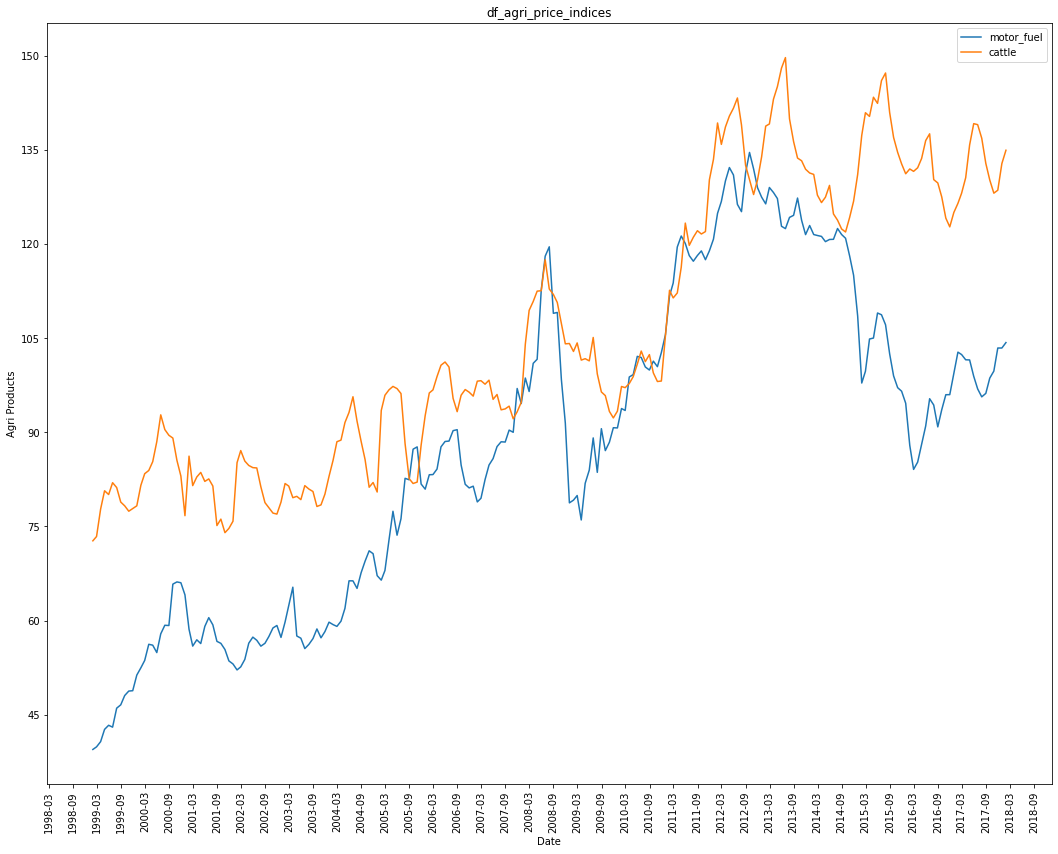

In [92]:
fig, ax = plt.subplots(figsize=(18, 14))

sns.lineplot(ax = ax, x='month', y='motor_fuel', data=df_agri_price_indices, label="motor_fuel")
#sns.lineplot(ax = ax, x='month', y='potatoes', data=df_agri_price_indices, label="potatoes")
sns.lineplot(ax = ax, x='month', y='cattle', data=df_agri_price_indices, label="cattle")

ax.set_title("df_agri_price_indices")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

ax.yaxis.set_major_locator(ticker.MaxNLocator())
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Agri Products')

plt.show()

### Rebase Check

Check that the rebasing from base 2000 to base 2010 has worked before we append the 1995-2010 data to the 2005-2018 data !!


https://data.cso.ie/table/AHM01 -> 1995-2010 data 

https://data.cso.ie/table/AHM03 -> 2005-2018 data

**Rebase technique:** https://stats.stackexchange.com/questions/154577/how-to-work-with-index-numbers#:~:text=Rebasing%20an%20index,multiplying%20the%20result%20by%20100.

In [93]:
start_year=2005
end_year=2010

In [94]:
data_2018_base_2010 = df_agri_price_2018_3[
    (df_agri_price_2018_3.index.year >= start_year) & 
    (df_agri_price_2018_3.index.year <= end_year)].motor_fuel

In [95]:
data_2010_rebased_2010 = df_agri_price_2010_3[
        (df_agri_price_2010_3.index.year >= start_year) & 
        (df_agri_price_2010_3.index.year <= end_year)].motor_fuel

In [96]:
data_2010_base_2000 = df_agri_price_2010_2[
    (df_agri_price_2010_2.index.year >= start_year) &
    (df_agri_price_2010_2.index.year <= end_year)]["energy_-_motor_fuels__input"]

In [97]:
len(data_2018_base_2010)

72

In [98]:
len(data_2010_rebased_2010)

72

In [99]:
len(data_2010_base_2000)

72

In [100]:
data_mixed_bases=pd.merge(data_2018_base_2010, data_2010_rebased_2010, right_index=True, left_index=True)

In [101]:
data_mixed_bases=pd.merge(data_mixed_bases, data_2010_base_2000, right_index=True, left_index=True)

In [102]:
data_mixed_bases.rename(columns = {'motor_fuel_x':'2018_motor_fuel_base_2010',
                                   'motor_fuel_y':'2010_motor_fuel_rebased_2010',
                                  'energy_-_motor_fuels__input':'2010_motor_fuel_base_2000'}
                        , inplace = True)

In [103]:
data_mixed_bases

,2018_motor_fuel_base_2010,2010_motor_fuel_rebased_2010,2010_motor_fuel_base_2000
month,,,
2005-01-31,71.220,66.440222,112.032
2005-02-28,71.240,67.979771,114.628
2005-03-31,72.550,72.871221,122.876
2005-04-30,79.050,77.423449,130.552
2005-05-31,78.720,73.607192,124.117
...,...,...,...
2010-08-31,101.543,99.949146,168.535
2010-09-30,101.414,101.367121,170.926
2010-10-31,100.873,100.487040,169.442


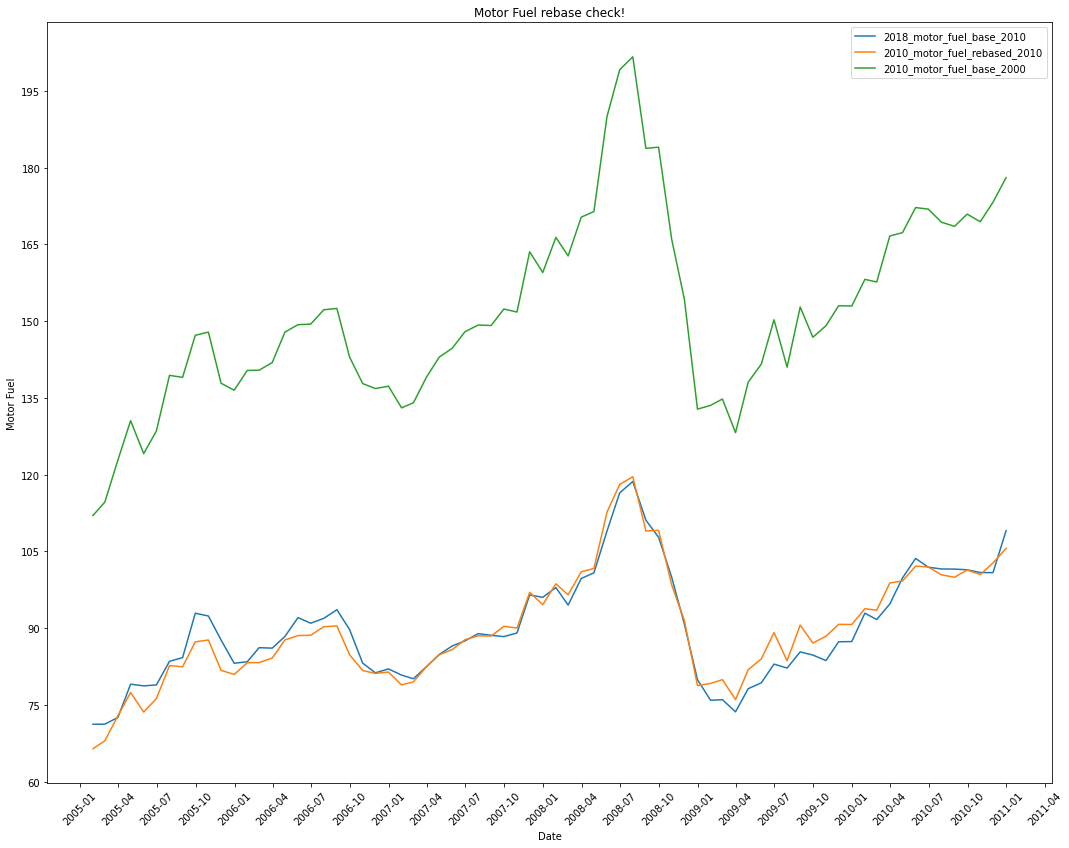

In [104]:
fig, ax = plt.subplots(figsize=(18, 14))

sns.lineplot(ax = ax, x='month', y='2018_motor_fuel_base_2010', data=data_mixed_bases, label="2018_motor_fuel_base_2010")
sns.lineplot(ax = ax, x='month', y='2010_motor_fuel_rebased_2010', data=data_mixed_bases, label="2010_motor_fuel_rebased_2010")
sns.lineplot(ax = ax, x='month', y='2010_motor_fuel_base_2000', data=data_mixed_bases, label="2010_motor_fuel_base_2000")

ax.set_title("Motor Fuel rebase check!")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-locators.html
ax.yaxis.set_major_locator(ticker.MaxNLocator())
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Motor Fuel')

plt.show()

In [105]:
data_mixed_bases.isnull().sum()

2018_motor_fuel_base_2010       0
2010_motor_fuel_rebased_2010    0
2010_motor_fuel_base_2000       0
dtype: int64

rebasing looks like it has basically worked.. !

## df_agri_price_2022

https://data.cso.ie/table/AHM04

In [106]:
df_agri_price_2022 = pd.read_csv("data/ie/agri_price_index/AHM04_2014M01-2022M02.csv")

In [107]:
df_agri_price_2022

,Statistic,Month,Agricultural Product,UNIT,VALUE
0,Agricultural Input and Output Price Indices (B...,2014M01,Agricultural output price index,Base 2015=100,114.60
1,Agricultural Input and Output Price Indices (B...,2014M01,Crop output,Base 2015=100,102.72
2,Agricultural Input and Output Price Indices (B...,2014M01,Cereals including seeds,Base 2015=100,111.31
3,Agricultural Input and Output Price Indices (B...,2014M01,Fruit and Vegetables,Base 2015=100,99.06
4,Agricultural Input and Output Price Indices (B...,2014M01,Potatoes including seeds,Base 2015=100,91.51
...,...,...,...,...,...
4013,Agricultural Input and Output Price Indices (B...,2022M02,Compound feeding stuffs for pigs,Base 2015=100,144.17
4014,Agricultural Input and Output Price Indices (B...,2022M02,Compound feeding stuffs for poultry,Base 2015=100,118.17
4015,Agricultural Input and Output Price Indices (B...,2022M02,Other compound feeding stuffs,Base 2015=100,135.36
4016,Agricultural Input and Output Price Indices (B...,2022M02,Maintenance of materials and buildings,Base 2015=100,107.83


In [108]:
snake_case_columns(df_agri_price_2022)

In [109]:
df_agri_price_2022.statistic.unique()

array(['Agricultural Input and Output Price Indices (Base 2015=100)'],
      dtype=object)

In [110]:
df_agri_price_2022.unit.unique()

array(['Base 2015=100'], dtype=object)

In [111]:
sorted(df_agri_price_2022.agricultural_product.unique())

['Agricultural input price index',
 'Agricultural output price index',
 'Animal output',
 'Animal products',
 'Animals',
 'Calves',
 'Cattle',
 'Cattle excluding calves',
 'Cereals including seeds',
 'Compound feeding stuffs',
 'Compound feeding stuffs for calves',
 'Compound feeding stuffs for cattle excluding calves',
 'Compound feeding stuffs for pigs',
 'Compound feeding stuffs for poultry',
 'Compound fertilisers',
 'Crop output',
 'Eggs',
 'Electricity',
 'Energy',
 'Feeding stuffs',
 'Fertilisers',
 'Fruit and Vegetables',
 'Lubricants',
 'Maintenance of materials and buildings',
 'Milk',
 'Motor fuel',
 'NPK fertilisers',
 'Other compound feeding stuffs',
 'Other fertilisers',
 'Other goods and services',
 'PK fertilisers',
 'Pigs',
 'Plant protection products',
 'Potatoes including seeds',
 'Poultry',
 'Seeds',
 'Sheep',
 'Straight feeding stuffs',
 'Straight fertilisers',
 'Veterinary expenses',
 'Wool']

In [112]:
df_agri_price_2022 = df_agri_price_2022.drop(["statistic", "unit"], axis=1)

In [113]:
cso_date_to_datetime(df_agri_price_2022, "month")

In [114]:
df_agri_price_2022

,month,agricultural_product,value
0,2014-01-31,Agricultural output price index,114.60
1,2014-01-31,Crop output,102.72
2,2014-01-31,Cereals including seeds,111.31
3,2014-01-31,Fruit and Vegetables,99.06
4,2014-01-31,Potatoes including seeds,91.51
...,...,...,...
4013,2022-02-28,Compound feeding stuffs for pigs,144.17
4014,2022-02-28,Compound feeding stuffs for poultry,118.17
4015,2022-02-28,Other compound feeding stuffs,135.36
4016,2022-02-28,Maintenance of materials and buildings,107.83


In [115]:
df_agri_price_2022_2 = df_agri_price_2022.pivot(index='month', columns='agricultural_product', values='value')

In [116]:
snake_case_columns(df_agri_price_2022_2)

In [117]:
df_agri_price_2022_2.isnull().any()

agricultural_input_price_index                         False
agricultural_output_price_index                        False
animal_output                                          False
animal_products                                        False
animals                                                False
calves                                                 False
cattle                                                 False
cattle_excluding_calves                                False
cereals_including_seeds                                False
compound_feeding_stuffs                                False
compound_feeding_stuffs_for_calves                     False
compound_feeding_stuffs_for_cattle_excluding_calves    False
compound_feeding_stuffs_for_pigs                       False
compound_feeding_stuffs_for_poultry                    False
compound_fertilisers                                   False
crop_output                                            False
eggs                    

In [118]:
df_agri_price_2022_2.columns

Index(['agricultural_input_price_index', 'agricultural_output_price_index',
       'animal_output', 'animal_products', 'animals', 'calves', 'cattle',
       'cattle_excluding_calves', 'cereals_including_seeds',
       'compound_feeding_stuffs', 'compound_feeding_stuffs_for_calves',
       'compound_feeding_stuffs_for_cattle_excluding_calves',
       'compound_feeding_stuffs_for_pigs',
       'compound_feeding_stuffs_for_poultry', 'compound_fertilisers',
       'crop_output', 'eggs', 'electricity', 'energy', 'feeding_stuffs',
       'fertilisers', 'fruit_and_vegetables', 'lubricants',
       'maintenance_of_materials_and_buildings', 'milk', 'motor_fuel',
       'npk_fertilisers', 'other_compound_feeding_stuffs', 'other_fertilisers',
       'other_goods_and_services', 'pk_fertilisers', 'pigs',
       'plant_protection_products', 'potatoes_including_seeds', 'poultry',
       'seeds', 'sheep', 'straight_feeding_stuffs', 'straight_fertilisers',
       'veterinary_expenses', 'wool'],
      d

In [119]:
col_names_2022=sorted(df_agri_price_2022_2.columns)
col_names_2022

['agricultural_input_price_index',
 'agricultural_output_price_index',
 'animal_output',
 'animal_products',
 'animals',
 'calves',
 'cattle',
 'cattle_excluding_calves',
 'cereals_including_seeds',
 'compound_feeding_stuffs',
 'compound_feeding_stuffs_for_calves',
 'compound_feeding_stuffs_for_cattle_excluding_calves',
 'compound_feeding_stuffs_for_pigs',
 'compound_feeding_stuffs_for_poultry',
 'compound_fertilisers',
 'crop_output',
 'eggs',
 'electricity',
 'energy',
 'feeding_stuffs',
 'fertilisers',
 'fruit_and_vegetables',
 'lubricants',
 'maintenance_of_materials_and_buildings',
 'milk',
 'motor_fuel',
 'npk_fertilisers',
 'other_compound_feeding_stuffs',
 'other_fertilisers',
 'other_goods_and_services',
 'pigs',
 'pk_fertilisers',
 'plant_protection_products',
 'potatoes_including_seeds',
 'poultry',
 'seeds',
 'sheep',
 'straight_feeding_stuffs',
 'straight_fertilisers',
 'veterinary_expenses',
 'wool']

In [120]:
col_names_2022_new = {}
for i in range(len(col_names_2022)): 
    name = col_names_2022[i]
    colname = re.sub(r"[_]{1,2}input|_output|_including_a.i.", "", col_names_2022[i])
    #print(colname,":", name)
    if colname == 'cereals_including_seeds':
        col_names_2022_new[name] = 'cereals'
    elif colname == 'potatoes_including_seeds':
        col_names_2022_new[name] = 'potatoes'
    elif colname == 'fruit_and_vegetables':
        col_names_2022_new[name] = 'vegetables'

In [121]:
col_names_2022_new

{'cereals_including_seeds': 'cereals',
 'fruit_and_vegetables': 'vegetables',
 'potatoes_including_seeds': 'potatoes'}

In [122]:
df_agri_price_2022_3 = df_agri_price_2022_2.rename(col_names_2022_new, axis=1)

In [123]:
len(df_agri_price_indices.columns)

24

In [124]:
len(df_agri_price_2022_3.columns)

41

In [125]:
# intersection between newly created 1995-2018 data and 2014-2022 data
len(sorted(list(set(df_agri_price_2022_3.columns) & set(df_agri_price_indices.columns))))

24

In [126]:
# check that df_agri_price_2022_3 has exactly the same columns as df_agri_price_indices
# and that none are missing (empty list if none are missing)
temp1=(sorted(set(set(df_agri_price_2022_3.columns) & set(df_agri_price_indices.columns))))
temp2 = [x for x in df_agri_price_indices.columns if x not in temp1]
temp2

[]

In [127]:
df_agri_price_2022_3

,agricultural_input_price_index,agricultural_output_price_index,animal_output,animal_products,animals,calves,cattle,cattle_excluding_calves,cereals,compound_feeding_stuffs,...,pigs,plant_protection_products,potatoes,poultry,seeds,sheep,straight_feeding_stuffs,straight_fertilisers,veterinary_expenses,wool
month,,,,,,,,,,,,,,,,,,,,,
2014-01-31,106.42,114.60,116.16,147.09,95.65,96.07,93.54,93.52,111.31,114.96,...,108.10,99.90,91.51,103.67,113.18,85.45,116.24,98.74,99.15,77.03
2014-02-28,106.54,113.27,114.73,145.75,94.15,57.01,91.61,91.81,111.31,115.37,...,105.80,99.90,88.18,103.67,113.18,88.43,115.44,98.63,99.15,77.03
2014-03-31,103.63,111.40,112.82,141.01,94.13,61.74,90.99,91.15,111.31,107.55,...,103.77,99.90,78.16,104.20,102.76,97.37,112.51,99.35,99.15,77.03
2014-04-30,104.23,110.56,112.01,135.91,96.16,76.03,91.58,91.67,111.31,109.16,...,109.53,99.95,71.80,100.76,102.76,108.34,111.42,100.21,99.15,77.03
2014-05-31,104.53,110.02,111.41,131.02,98.40,79.51,92.90,92.97,111.31,109.49,...,115.54,100.06,70.41,100.76,102.76,112.92,111.90,101.49,99.15,81.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,117.72,119.93,117.66,132.57,107.77,143.83,107.04,106.83,154.54,123.62,...,101.46,105.28,160.86,101.00,112.59,130.85,133.31,122.74,110.33,13.55
2021-11-30,119.43,119.85,117.79,132.96,107.74,121.55,106.25,106.16,154.54,125.50,...,98.97,105.28,150.96,101.24,112.59,142.20,138.22,127.01,110.33,13.55
2021-12-31,123.85,124.58,123.50,143.87,110.00,109.04,108.63,108.62,154.54,127.75,...,99.06,105.28,150.96,103.95,112.59,147.48,141.91,159.79,110.33,13.55


In [128]:
df_agri_price_indices[df_agri_price_indices.index.year == 2010].mean()

feeding_stuffs                                         100.0
fertilisers                                            100.0
cereals                                                100.0
compound_feeding_stuffs_for_cattle_excluding_calves    100.0
compound_feeding_stuffs_for_pigs                       100.0
compound_feeding_stuffs_for_poultry                    100.0
npk_fertilisers                                        100.0
pk_fertilisers                                         100.0
electricity                                            100.0
motor_fuel                                             100.0
cattle                                                 100.0
milk                                                   100.0
other_goods_and_services                               100.0
pigs                                                   100.0
plant_protection_products                              100.0
potatoes                                               100.0
poultry                 

In [129]:
# df_agri_price_2022_3 data is based at 2015
# we want to rebase df_agri_price_indices to 2015 (from 2010) so we 
# can add on the missing three years 2019-2022 to df_agri_price_indices

# https://stats.stackexchange.com/questions/154577/how-to-work-with-index-numbers#:~:text=Rebasing%20an%20index,multiplying%20the%20result%20by%20100.
df_agri_price_indices_rebased = df_agri_price_indices /df_agri_price_indices[df_agri_price_indices.index.year == 2015].mean() * 100

In [130]:
df_agri_price_indices_rebased.isnull().sum()

feeding_stuffs                                         0
fertilisers                                            0
cereals                                                0
compound_feeding_stuffs_for_cattle_excluding_calves    0
compound_feeding_stuffs_for_pigs                       0
compound_feeding_stuffs_for_poultry                    0
npk_fertilisers                                        0
pk_fertilisers                                         0
electricity                                            0
motor_fuel                                             0
cattle                                                 0
milk                                                   0
other_goods_and_services                               0
pigs                                                   0
plant_protection_products                              0
potatoes                                               0
poultry                                                0
seeds                          

In [131]:
df_agri_price_indices_rebased

,feeding_stuffs,fertilisers,cereals,compound_feeding_stuffs_for_cattle_excluding_calves,compound_feeding_stuffs_for_pigs,compound_feeding_stuffs_for_poultry,npk_fertilisers,pk_fertilisers,electricity,motor_fuel,...,plant_protection_products,potatoes,poultry,seeds,sheep,straight_feeding_stuffs,straight_fertilisers,crop_output,vegetables,veterinary_expenses
month,,,,,,,,,,,,,,,,,,,,,
1999-01-31,65.467620,47.219084,73.544704,67.928056,59.914382,62.432184,47.209419,46.948938,49.212939,38.714206,...,97.658784,89.778928,65.028629,72.415643,48.391597,68.394214,45.758695,76.999954,73.595441,69.852571
1999-02-28,65.535112,47.572218,73.544704,68.139890,60.532694,62.368866,47.508844,47.441065,49.212939,39.121724,...,97.658784,90.224113,64.742789,72.415643,55.431528,66.636911,46.161412,77.488621,74.410698,69.926101
1999-03-31,65.737589,47.521770,73.544704,68.281112,60.223538,62.622140,47.508844,47.441065,49.212939,39.936760,...,97.658784,90.224113,65.743229,72.415643,62.788573,68.394214,46.060733,77.279192,74.188355,70.293746
1999-04-30,65.805081,47.219084,73.544704,67.998667,60.780018,62.748778,47.259323,47.391853,49.212939,41.857916,...,97.272399,85.871195,65.957609,72.415643,63.549646,68.605090,45.607676,75.603763,71.668471,70.661391
1999-05-31,65.872574,47.219084,73.544704,68.281112,61.151005,62.558822,47.309227,47.441065,49.212939,42.498302,...,97.272399,79.638609,66.243449,72.415643,69.891926,68.323922,45.506997,74.696238,72.706070,70.661391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-30,96.619958,77.973188,105.304331,97.589221,96.345075,95.086391,79.515964,87.814967,94.621581,96.848309,...,103.573212,114.662869,99.913952,99.355924,94.208412,97.581971,74.154960,105.996864,103.094518,102.290606
2017-10-31,96.797911,79.477833,105.304331,97.865285,96.345075,95.086391,80.886673,88.079327,96.893370,97.946783,...,103.573212,100.257986,99.399446,99.298380,91.998484,97.894858,75.953369,103.649178,102.978049,102.290606
2017-11-30,97.181063,79.988382,105.304331,98.319313,96.345075,95.086391,81.294493,88.166813,98.773790,101.560262,...,103.573212,85.745677,98.839464,99.298380,95.690792,98.097912,76.626978,101.209807,102.657759,102.290606


## df_agri_price_indices_final

In this section the series for the full date range is built (1995-2022).

In [132]:
len(df_agri_price_indices_rebased.columns)

24

In [133]:
# intersection between newly created 1995-2018 data and 2014-2022 data
len(sorted(list(set(df_agri_price_2022_3.columns) & set(df_agri_price_indices_rebased.columns))))

24

In [134]:
df_tmp_2 = df_agri_price_indices_rebased[df_agri_price_indices_rebased.index.year < 2018]

In [135]:
df_tmp_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 228 entries, 1999-01-31 to 2017-12-31
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   feeding_stuffs                                       228 non-null    float64
 1   fertilisers                                          228 non-null    float64
 2   cereals                                              228 non-null    float64
 3   compound_feeding_stuffs_for_cattle_excluding_calves  228 non-null    float64
 4   compound_feeding_stuffs_for_pigs                     228 non-null    float64
 5   compound_feeding_stuffs_for_poultry                  228 non-null    float64
 6   npk_fertilisers                                      228 non-null    float64
 7   pk_fertilisers                                       228 non-null    float64
 8   electricity                                        

In [136]:
df_tmp_3 = df_agri_price_2022_3[df_agri_price_2022_3.index.year >= 2018]

In [137]:
df_tmp_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2018-01-31 to 2022-02-28
Data columns (total 41 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   agricultural_input_price_index                       50 non-null     float64
 1   agricultural_output_price_index                      50 non-null     float64
 2   animal_output                                        50 non-null     float64
 3   animal_products                                      50 non-null     float64
 4   animals                                              50 non-null     float64
 5   calves                                               50 non-null     float64
 6   cattle                                               50 non-null     float64
 7   cattle_excluding_calves                              50 non-null     float64
 8   cereals                                             

In [138]:
print("df_tmp_2 min date","  :",df_tmp_2.index.min())
print("df_tmp_2 max date","  :",df_tmp_2.index.max())

print("df_tmp_3 min date","  :",df_tmp_3.index.min())
print("df_tmp_3 max date","  :",df_tmp_3.index.max())

df_tmp_2 min date   : 1999-01-31 00:00:00
df_tmp_2 max date   : 2017-12-31 00:00:00
df_tmp_3 min date   : 2018-01-31 00:00:00
df_tmp_3 max date   : 2022-02-28 00:00:00


In [139]:
df_agri_price_indices_final = df_tmp_2.append(df_tmp_3)

In [140]:
df_agri_price_indices_final.isnull().sum()

feeding_stuffs                                           0
fertilisers                                              0
cereals                                                  0
compound_feeding_stuffs_for_cattle_excluding_calves      0
compound_feeding_stuffs_for_pigs                         0
compound_feeding_stuffs_for_poultry                      0
npk_fertilisers                                          0
pk_fertilisers                                           0
electricity                                              0
motor_fuel                                               0
cattle                                                   0
milk                                                     0
other_goods_and_services                                 0
pigs                                                     0
plant_protection_products                                0
potatoes                                                 0
poultry                                                 

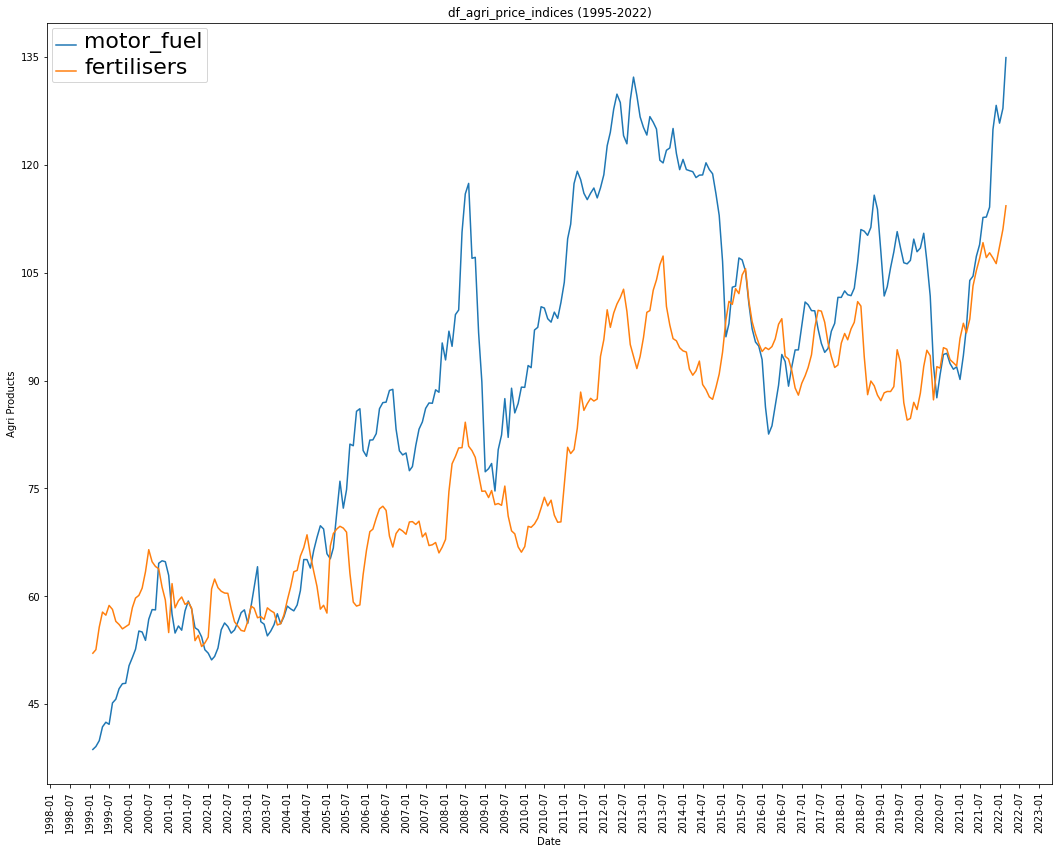

In [141]:
fig, ax = plt.subplots(figsize=(18, 14))

sns.lineplot(ax = ax, x='month', y='motor_fuel', data=df_agri_price_indices_final, label="motor_fuel")
#sns.lineplot(ax = ax, x='month', y='potatoes', data=df_agri_price_indices, label="potatoes")
sns.lineplot(ax = ax, x='month', y='cattle', data=df_agri_price_indices_final, label="fertilisers")

ax.set_title("df_agri_price_indices (1995-2022)")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

ax.yaxis.set_major_locator(ticker.MaxNLocator())
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Agri Products')

# https://stackoverflow.com/questions/44880444/how-to-increase-the-font-size-of-the-legend-in-my-seaborn-plot
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text

plt.show()

In [142]:
df_agri_price_indices_final.isnull().sum()

feeding_stuffs                                           0
fertilisers                                              0
cereals                                                  0
compound_feeding_stuffs_for_cattle_excluding_calves      0
compound_feeding_stuffs_for_pigs                         0
compound_feeding_stuffs_for_poultry                      0
npk_fertilisers                                          0
pk_fertilisers                                           0
electricity                                              0
motor_fuel                                               0
cattle                                                   0
milk                                                     0
other_goods_and_services                                 0
pigs                                                     0
plant_protection_products                                0
potatoes                                                 0
poultry                                                 

In [143]:
df_agri_price_indices_final =df_agri_price_indices_final.dropna(axis="columns")

In [144]:
df_agri_price_indices_final.isnull().sum()

feeding_stuffs                                         0
fertilisers                                            0
cereals                                                0
compound_feeding_stuffs_for_cattle_excluding_calves    0
compound_feeding_stuffs_for_pigs                       0
compound_feeding_stuffs_for_poultry                    0
npk_fertilisers                                        0
pk_fertilisers                                         0
electricity                                            0
motor_fuel                                             0
cattle                                                 0
milk                                                   0
other_goods_and_services                               0
pigs                                                   0
plant_protection_products                              0
potatoes                                               0
poultry                                                0
seeds                          

In [145]:
df_agri_price_indices_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 278 entries, 1999-01-31 to 2022-02-28
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   feeding_stuffs                                       278 non-null    float64
 1   fertilisers                                          278 non-null    float64
 2   cereals                                              278 non-null    float64
 3   compound_feeding_stuffs_for_cattle_excluding_calves  278 non-null    float64
 4   compound_feeding_stuffs_for_pigs                     278 non-null    float64
 5   compound_feeding_stuffs_for_poultry                  278 non-null    float64
 6   npk_fertilisers                                      278 non-null    float64
 7   pk_fertilisers                                       278 non-null    float64
 8   electricity                                        

## final output

In [146]:
df_agri_price_indices_final

,feeding_stuffs,fertilisers,cereals,compound_feeding_stuffs_for_cattle_excluding_calves,compound_feeding_stuffs_for_pigs,compound_feeding_stuffs_for_poultry,npk_fertilisers,pk_fertilisers,electricity,motor_fuel,...,plant_protection_products,potatoes,poultry,seeds,sheep,straight_feeding_stuffs,straight_fertilisers,crop_output,vegetables,veterinary_expenses
month,,,,,,,,,,,,,,,,,,,,,
1999-01-31,65.467620,47.219084,73.544704,67.928056,59.914382,62.432184,47.209419,46.948938,49.212939,38.714206,...,97.658784,89.778928,65.028629,72.415643,48.391597,68.394214,45.758695,76.999954,73.595441,69.852571
1999-02-28,65.535112,47.572218,73.544704,68.139890,60.532694,62.368866,47.508844,47.441065,49.212939,39.121724,...,97.658784,90.224113,64.742789,72.415643,55.431528,66.636911,46.161412,77.488621,74.410698,69.926101
1999-03-31,65.737589,47.521770,73.544704,68.281112,60.223538,62.622140,47.508844,47.441065,49.212939,39.936760,...,97.658784,90.224113,65.743229,72.415643,62.788573,68.394214,46.060733,77.279192,74.188355,70.293746
1999-04-30,65.805081,47.219084,73.544704,67.998667,60.780018,62.748778,47.259323,47.391853,49.212939,41.857916,...,97.272399,85.871195,65.957609,72.415643,63.549646,68.605090,45.607676,75.603763,71.668471,70.661391
1999-05-31,65.872574,47.219084,73.544704,68.281112,61.151005,62.558822,47.309227,47.441065,49.212939,42.498302,...,97.272399,79.638609,66.243449,72.415643,69.891926,68.323922,45.506997,74.696238,72.706070,70.661391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,124.090000,120.810000,154.540000,124.810000,130.480000,112.930000,120.070000,120.520000,127.040000,124.890000,...,105.280000,160.860000,101.000000,112.590000,130.850000,133.310000,122.740000,137.230000,111.000000,110.330000
2021-11-30,126.120000,123.150000,154.540000,126.650000,134.580000,112.920000,121.370000,124.760000,133.060000,128.250000,...,105.280000,150.960000,101.240000,112.590000,142.200000,138.220000,127.010000,135.510000,110.980000,110.330000
2021-12-31,128.440000,147.670000,154.540000,129.950000,136.030000,113.220000,142.810000,137.150000,134.740000,125.780000,...,105.280000,150.960000,103.950000,112.590000,147.480000,141.910000,159.790000,132.760000,104.470000,110.330000


# irish_pig_prices_1995-2022

Bring in www.bordbia.ie pig meat prices !

In [147]:
df_pig = pd.read_excel("data/ie/irish_pig_prices_1995-2022.xlsx", skiprows=1)

In [148]:
# https://www.mla.com.au/general/glossary/
# ¢/kg:  Cents per kilogram. Units which cattle are sold in at a physical prime market.
df_pig.head()

,w/c,Ire (c/kg)
0,1995-01-07,98.279
1,1995-01-14,96.56
2,1995-01-21,95.829
3,1995-01-28,95.671
4,1995-02-04,116.511


In [149]:
df_pig = df_pig.rename({"w/c":"date","Ire (c/kg)":"cents_per_kg"}, axis=1)

In [150]:
# https://stackoverflow.com/questions/736043/checking-if-a-string-can-be-converted-to-float-in-python
def is_float(element):
    try:
        float(element)
        return True
    except ValueError:
        return False

In [151]:
df_pig["cents_per_kg"] = df_pig["cents_per_kg"].apply(lambda x: np.where(is_float(x), x, None))

In [152]:
df_pig.isnull().any()

date            False
cents_per_kg     True
dtype: bool

In [153]:
df_pig_na = df_pig[df_pig.isna().any(axis=1)]
print(df_pig.count())

date            1423
cents_per_kg    1421
dtype: int64


In [154]:
# only 1 null value so no need to get too excited
df_pig.isnull().sum()

date            0
cents_per_kg    2
dtype: int64

In [155]:
df_pig = df_pig.fillna(method='ffill')

In [156]:
df_pig.isnull().sum()

date            0
cents_per_kg    0
dtype: int64

In [157]:
df_pig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1423 non-null   datetime64[ns]
 1   cents_per_kg  1423 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.4 KB


In [158]:
df_pig = df_pig.astype(dtype= {"cents_per_kg":"float64"})

In [159]:
df_pig=df_pig.set_index("date").resample('M').mean()

In [160]:
df_pig = df_pig[:-2] # get rid of mar and apr 2022

In [161]:
df_pig = df_pig[df_pig.index.year > 1998]

## final output

In [162]:
df_pig

,cents_per_kg
date,
1999-01-31,90.743989
1999-02-28,89.066750
1999-03-31,94.820500
1999-04-30,96.882000
1999-05-31,105.007183
...,...
2021-10-31,147.830000
2021-11-30,143.414000
2021-12-31,143.550000


# EUR/GBP

https://www.investing.com/currencies/eur-gbp-historical-data

In [163]:
def prepare_forex_data(file_path):
    from pandas.tseries.offsets import MonthEnd
    
    df_cur = pd.read_csv(file_path)
    snake_case_columns(df_cur)
    
    # https://dataindependent.com/pandas/pandas-to-datetime-string-to-date-pd-to_datetime/
    df_cur["date"] = pd.to_datetime(df_cur["date"], format='%b %y') + MonthEnd(1)
    # only need final day closing price
    df_cur = df_cur.drop(["open", "high", "low", "change_%"], axis=1) 
    df_cur = df_cur.set_index("date")
    df_cur = df_cur.sort_index()
    return df_cur

In [164]:
df_eurgbp = prepare_forex_data("data/ie/EUR_GBP_1991-2022.csv")

In [165]:
df_eurgbp.rename(columns={'price': 'eurgbp'}, inplace=True)

## final output

In [166]:
df_eurgbp

,eurgbp
date,
1991-01-31,0.7087
1991-02-28,0.7038
1991-03-31,0.6936
1991-04-30,0.6912
1991-05-31,0.6955
...,...
2021-12-31,0.8400
2022-01-31,0.8350
2022-02-28,0.8358


# EUR/USD

https://www.investing.com/currencies/eur-usd-historical-data

In [167]:
df_eurusd = prepare_forex_data("data/ie/EUR_USD_1991-2022.csv")

In [168]:
df_eurusd.rename(columns={'price': 'eurusd'}, inplace=True)

## final output

In [169]:
df_eurusd

,eurusd
date,
1991-01-31,1.3932
1991-02-28,1.3457
1991-03-31,1.2119
1991-04-30,1.1986
1991-05-31,1.1804
...,...
2021-12-31,1.1368
2022-01-31,1.1233
2022-02-28,1.1219


# Global_price_of_Beef_1990-2021

https://fred.stlouisfed.org/series/PBEEFUSDM

In [170]:
df_global_beef = pd.read_csv("data/ie/Global_price_of_Beef_1990-2021.csv")

In [171]:
# "Units:  U.S. Cents per Pound, Not Seasonally Adjusted"
df_global_beef

,DATE,PBEEFUSDM
0,1990-01-01,126.309998
1,1990-02-01,111.459991
2,1990-03-01,112.670013
3,1990-04-01,112.129997
4,1990-05-01,112.489990
...,...,...
378,2021-07-01,245.681818
379,2021-08-01,247.136364
380,2021-09-01,249.250000
381,2021-10-01,251.285714


In [172]:
df_global_beef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       383 non-null    object 
 1   PBEEFUSDM  383 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.1+ KB


In [173]:
snake_case_columns(df_global_beef)

In [174]:
df_global_beef = df_global_beef.astype(dtype= {"date":"datetime64[ns]"})

In [175]:
# we need to be able to join with the 
df_global_beef["date"] = df_global_beef["date"]+ MonthEnd(1)

In [176]:
df_global_beef

,date,pbeefusdm
0,1990-01-31,126.309998
1,1990-02-28,111.459991
2,1990-03-31,112.670013
3,1990-04-30,112.129997
4,1990-05-31,112.489990
...,...,...
378,2021-07-31,245.681818
379,2021-08-31,247.136364
380,2021-09-30,249.250000
381,2021-10-31,251.285714


In [177]:
# https://stackoverflow.com/questions/34915828/pandas-date-range-to-generate-monthly-data-at-beginning-of-the-month
# https://pandas.pydata.org/docs/reference/api/pandas.Index.to_frame.html
df_missing_months = pd.date_range(start='31-DEC-2021', end='28-FEB-2022', freq='M').to_frame(index=False, name='date')
df_missing_months["pbeefusdm"] = np.nan
df_missing_months

,date,pbeefusdm
0,2021-12-31,NaN
1,2022-01-31,NaN
2,2022-02-28,NaN


In [178]:
# https://stackoverflow.com/questions/52693690/adding-dates-to-a-pandas-data-frame
#pd.merge(df_global_beef, df_missing_months, left_on='date', right_on='date', how='outer')#.drop(columns=0)
df_global_beef = pd.concat([df_global_beef, df_missing_months]).reset_index(drop=True)

In [179]:
# impute data for last few missing months
# rolling mean values will give more weight to the most recent values in the time series and be 
# a better reflection on the trend of the data, rather than using the mean or median for the whole period
# https://drnesr.medium.com/filling-gaps-of-a-time-series-using-python-d4bfddd8c460
df_global_beef = df_global_beef.assign(pbeefusdm=df_global_beef.pbeefusdm.fillna(df_global_beef.pbeefusdm.rolling(6,min_periods=1,center=False).mean()))

In [180]:
df_global_beef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       386 non-null    datetime64[ns]
 1   pbeefusdm  386 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.2 KB


In [181]:
df_global_beef.set_index("date", inplace=True)

In [182]:
df_global_beef = df_global_beef[df_global_beef.index.year > 1998]

## final output

In [183]:
df_global_beef

,pbeefusdm
date,
1999-01-31,77.599998
1999-02-28,81.825000
1999-03-31,81.500000
1999-04-30,79.111111
1999-05-31,79.850000
...,...
2021-10-31,251.285714
2021-11-30,258.454545
2021-12-31,250.361688


# sunshine

https://data.cso.ie/table/MTM03

In [184]:
#df_sunshine = pd.read_csv("data/ie/weather/dublin_airport_sunshine_hours.csv") # dublin airport had 12 null months between 1999-2022
#df_sunshine = pd.read_csv("data/ie/weather/mullingar_sunshine_hours.csv") # mullingar had 168 null months between 1999-2022
#df_sunshine = pd.read_csv("data/ie/weather/rosslare_sunshine_hours.csv") # rosslare had 169 null months between 1999-2022

df_sunshine = pd.read_csv("data/ie/weather/shannon_airport_sunshine_hours.csv")

In [185]:
df_sunshine

,Statistic,Month,Meteorological Weather Station,UNIT,VALUE
0,Most Sunshine Hours in a Day,1958M01,Shannon airport,Number,7.1
1,Most Sunshine Hours in a Day,1958M02,Shannon airport,Number,8.8
2,Most Sunshine Hours in a Day,1958M03,Shannon airport,Number,8.7
3,Most Sunshine Hours in a Day,1958M04,Shannon airport,Number,11.9
4,Most Sunshine Hours in a Day,1958M05,Shannon airport,Number,14.1
...,...,...,...,...,...
766,Most Sunshine Hours in a Day,2021M11,Shannon airport,Number,7.9
767,Most Sunshine Hours in a Day,2021M12,Shannon airport,Number,6.8
768,Most Sunshine Hours in a Day,2022M01,Shannon airport,Number,7.2
769,Most Sunshine Hours in a Day,2022M02,Shannon airport,Number,7.9


In [186]:
snake_case_columns(df_sunshine)

In [187]:
cso_date_to_datetime(df_sunshine, "month")

In [188]:
df_sunshine = df_sunshine.drop(["statistic","meteorological_weather_station", "unit"], axis=1)

In [189]:
df_sunshine = df_sunshine[df_sunshine.month.dt.year > 1998]

In [190]:
df_sunshine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 492 to 770
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   279 non-null    datetime64[ns]
 1   value   277 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.5 KB


In [191]:
df_sunshine.isnull().sum()

month    0
value    2
dtype: int64

In [192]:
df_sunshine_nulls = df_sunshine[df_sunshine.isna().any(axis=1)]
df_sunshine_nulls

,month,value
735,2019-04-30,NaN
738,2019-07-31,NaN


In [193]:
df_sunshine = df_sunshine.fillna(method='ffill')

In [194]:
df_sunshine[df_sunshine.isna().any(axis=1)]

,month,value


In [195]:
df_sunshine.isnull().sum()

month    0
value    0
dtype: int64

In [196]:
df_sunshine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 492 to 770
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   279 non-null    datetime64[ns]
 1   value   279 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.5 KB


In [197]:
df_sunshine.set_index("month", inplace=True)

In [198]:
df_sunshine = df_sunshine.rename(columns={'value': 'sunshine'})

## final output

In [199]:
df_sunshine

,sunshine
month,
1999-01-31,5.8
1999-02-28,7.7
1999-03-31,9.9
1999-04-30,13.2
1999-05-31,14.2
...,...
2021-11-30,7.9
2021-12-31,6.8
2022-01-31,7.2


# rain

https://data.cso.ie/table/MTM01

In [200]:
df_rain = pd.read_csv("data/ie/weather/shannon_airport_rain.csv")

In [201]:
df_rain

,Statistic,Month,Meteorological Weather Station,UNIT,VALUE
0,Total Rainfall,1958M01,Shannon airport,Millimetres,115.6
1,Total Rainfall,1958M02,Shannon airport,Millimetres,92.8
2,Total Rainfall,1958M03,Shannon airport,Millimetres,52.0
3,Total Rainfall,1958M04,Shannon airport,Millimetres,30.2
4,Total Rainfall,1958M05,Shannon airport,Millimetres,97.6
...,...,...,...,...,...
2308,Raindays (0.2mm or More),2021M11,Shannon airport,Number,22.0
2309,Raindays (0.2mm or More),2021M12,Shannon airport,Number,24.0
2310,Raindays (0.2mm or More),2022M01,Shannon airport,Number,14.0
2311,Raindays (0.2mm or More),2022M02,Shannon airport,Number,26.0


In [202]:
snake_case_columns(df_rain)

In [203]:
df_rain["statistic"].unique()

array(['Total Rainfall', 'Most Rainfall in a Day',
       'Raindays (0.2mm or More)'], dtype=object)

In [204]:
df_rain[df_rain["statistic"]=="Total Rainfall"]

,statistic,month,meteorological_weather_station,unit,value
0,Total Rainfall,1958M01,Shannon airport,Millimetres,115.6
1,Total Rainfall,1958M02,Shannon airport,Millimetres,92.8
2,Total Rainfall,1958M03,Shannon airport,Millimetres,52.0
3,Total Rainfall,1958M04,Shannon airport,Millimetres,30.2
4,Total Rainfall,1958M05,Shannon airport,Millimetres,97.6
...,...,...,...,...,...
766,Total Rainfall,2021M11,Shannon airport,Millimetres,53.0
767,Total Rainfall,2021M12,Shannon airport,Millimetres,112.6
768,Total Rainfall,2022M01,Shannon airport,Millimetres,45.9
769,Total Rainfall,2022M02,Shannon airport,Millimetres,145.9


In [205]:
df_rain[df_rain["statistic"]=="Most Rainfall in a Day"]

,statistic,month,meteorological_weather_station,unit,value
771,Most Rainfall in a Day,1958M01,Shannon airport,Millimetres,20.6
772,Most Rainfall in a Day,1958M02,Shannon airport,Millimetres,17.3
773,Most Rainfall in a Day,1958M03,Shannon airport,Millimetres,10.3
774,Most Rainfall in a Day,1958M04,Shannon airport,Millimetres,13.2
775,Most Rainfall in a Day,1958M05,Shannon airport,Millimetres,18.6
...,...,...,...,...,...
1537,Most Rainfall in a Day,2021M11,Shannon airport,Millimetres,11.5
1538,Most Rainfall in a Day,2021M12,Shannon airport,Millimetres,17.2
1539,Most Rainfall in a Day,2022M01,Shannon airport,Millimetres,12.2
1540,Most Rainfall in a Day,2022M02,Shannon airport,Millimetres,22.4


In [206]:
df_rain[df_rain["statistic"]=="Raindays (0.2mm or More)"]

,statistic,month,meteorological_weather_station,unit,value
1542,Raindays (0.2mm or More),1958M01,Shannon airport,Number,20.0
1543,Raindays (0.2mm or More),1958M02,Shannon airport,Number,16.0
1544,Raindays (0.2mm or More),1958M03,Shannon airport,Number,18.0
1545,Raindays (0.2mm or More),1958M04,Shannon airport,Number,9.0
1546,Raindays (0.2mm or More),1958M05,Shannon airport,Number,24.0
...,...,...,...,...,...
2308,Raindays (0.2mm or More),2021M11,Shannon airport,Number,22.0
2309,Raindays (0.2mm or More),2021M12,Shannon airport,Number,24.0
2310,Raindays (0.2mm or More),2022M01,Shannon airport,Number,14.0
2311,Raindays (0.2mm or More),2022M02,Shannon airport,Number,26.0


In [207]:
df_rain = df_rain[df_rain["statistic"]=="Total Rainfall"]

In [208]:
df_rain = df_rain.drop(["statistic","meteorological_weather_station","unit"], axis=1)

In [209]:
cso_date_to_datetime(df_rain, "month")

In [210]:
df_rain = df_rain[df_rain.month.dt.year > 1998]

In [211]:
df_rain.isnull().sum()

month    0
value    0
dtype: int64

In [212]:
df_rain[df_rain.isna().any(axis=1)]

,month,value


In [213]:
df_rain.set_index("month", inplace=True)

In [214]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 1999-01-31 to 2022-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   279 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB


In [215]:
df_rain.rename(columns={'value': 'rain'}, inplace=True)

## final output

In [216]:
df_rain

,rain
month,
1999-01-31,122.6
1999-02-28,78.0
1999-03-31,53.1
1999-04-30,66.9
1999-05-31,84.4
...,...
2021-11-30,53.0
2021-12-31,112.6
2022-01-31,45.9


# temperature

https://data.cso.ie/table/MTM02

In [217]:
df_temp = pd.read_csv("data/ie/weather/shannon_airport_temp.csv")

In [218]:
df_temp

,Statistic,Month,Meteorological Weather Station,UNIT,VALUE
0,Mean Temperature,1958M01,Shannon airport,Degrees C,5.6
1,Mean Temperature,1958M02,Shannon airport,Degrees C,6.4
2,Mean Temperature,1958M03,Shannon airport,Degrees C,5.5
3,Mean Temperature,1958M04,Shannon airport,Degrees C,8.9
4,Mean Temperature,1958M05,Shannon airport,Degrees C,11.0
...,...,...,...,...,...
766,Mean Temperature,2021M11,Shannon airport,Degrees C,9.1
767,Mean Temperature,2021M12,Shannon airport,Degrees C,8.0
768,Mean Temperature,2022M01,Shannon airport,Degrees C,7.0
769,Mean Temperature,2022M02,Shannon airport,Degrees C,8.0


In [219]:
snake_case_columns(df_temp)

In [220]:
df_temp = df_temp.drop(["statistic","meteorological_weather_station","unit"], axis=1)

In [221]:
cso_date_to_datetime(df_temp, "month")

In [222]:
df_temp = df_temp[df_temp.month.dt.year > 1998]

In [223]:
df_temp.isnull().sum()

month    0
value    0
dtype: int64

In [224]:
df_temp[df_temp.isna().any(axis=1)]

,month,value


In [225]:
df_temp.set_index("month", inplace=True)

In [226]:
df_temp = df_temp.rename(columns={'value': 'temp'})

## final output

In [227]:
df_temp

,temp
month,
1999-01-31,6.7
1999-02-28,7.8
1999-03-31,8.2
1999-04-30,10.4
1999-05-31,13.3
...,...
2021-11-30,9.1
2021-12-31,8.0
2022-01-31,7.0


# fuel_cost

regular unleaded AND diesel

https://www.theaa.ie/aa/motoring-advice/petrol-prices.aspx
    
"All figures in Euros"

fuel_prices_1995-2022.csv was preprossed manually using what is in FuelpricesHistory_Mar22.pdf and FuelpricesHistory_Mar22_preprocessed.xlsx

petrol was previously labelled "Regular Unleaded"

In [228]:
df_fuel = pd.read_csv("data/ie/fuel/fuel_prices_1995-2022.csv")

In [229]:
df_fuel

,date,petrol,diesel
0,31/01/1994,67.30,NaN
1,28/02/1994,66.28,68.31
2,31/03/1994,71.80,68.38
3,30/04/1994,69.58,68.44
4,31/05/1994,71.11,68.77
...,...,...,...
334,30/11/2021,172.60,163.30
335,31/12/2021,172.50,161.90
336,31/01/2022,175.50,166.10
337,28/02/2022,177.30,167.60


In [230]:
df_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    339 non-null    object 
 1   petrol  322 non-null    float64
 2   diesel  320 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.1+ KB


In [231]:
df_fuel = df_fuel.astype(dtype= {"date":"datetime64[ns]"})

In [232]:
df_fuel.isnull().sum()

date       0
petrol    17
diesel    19
dtype: int64

In [233]:
df_fuel[df_fuel.isna().any(axis=1)]

,date,petrol,diesel
0,1994-01-31,67.30,NaN
51,1998-04-30,NaN,NaN
52,1998-05-31,NaN,NaN
53,1998-06-30,NaN,NaN
54,1998-07-31,NaN,NaN
55,1998-08-31,NaN,NaN
56,1998-09-30,NaN,NaN
57,1998-10-31,NaN,NaN
58,1998-11-30,NaN,NaN
60,1999-01-31,72.38,NaN


In [234]:
df_fuel[df_fuel.date.dt.year==2000]

,date,petrol,diesel
72,2000-01-31,82.79,78.22
73,2000-02-29,84.56,81.75
74,2000-03-31,91.88,84.95
75,2000-04-30,92.82,85.33
76,2000-05-31,93.20,85.33
77,2000-06-30,94.24,85.15
78,2000-07-31,97.50,85.80
79,2000-08-31,94.70,85.50
80,2000-09-30,93.90,87.90
81,2000-10-31,96.40,94.90


In [235]:
# experiment between interprolation and rolling mean to fill in the NaNs

In [236]:
df_tmp_fuel = df_fuel.assign(petrol_roll=df_fuel.petrol.fillna(df_fuel.petrol.rolling(9,min_periods=1,center=False).mean()))

In [237]:
df_tmp_fuel = df_tmp_fuel.assign(diesel_roll=df_tmp_fuel.diesel.fillna(df_tmp_fuel.diesel.rolling(9,min_periods=1,center=False).mean()))

In [238]:
# https://stackoverflow.com/questions/49308530/missing-values-in-time-series-in-python
df_tmp_fuel['petrol_inter'] = df_tmp_fuel['petrol'].interpolate(method='linear')

In [239]:
df_tmp_fuel['diesel_inter'] = df_tmp_fuel['diesel'].interpolate(method='linear')

In [240]:
col_reorder = ["date","petrol","petrol_roll","petrol_inter","diesel","diesel_roll", "diesel_inter"]

In [241]:
df_tmp_fuel[df_tmp_fuel.isna().any(axis=1)][col_reorder]

,date,petrol,petrol_roll,petrol_inter,diesel,diesel_roll,diesel_inter
0,1994-01-31,67.30,67.300000,67.300000,NaN,NaN,NaN
51,1998-04-30,NaN,77.747500,74.155556,NaN,73.790000,70.975556
52,1998-05-31,NaN,77.828571,73.831111,NaN,73.818571,71.151111
53,1998-06-30,NaN,77.528333,73.506667,NaN,73.598333,71.326667
54,1998-07-31,NaN,77.042000,73.182222,NaN,73.498000,71.502222
55,1998-08-31,NaN,76.595000,72.857778,NaN,73.100000,71.677778
56,1998-09-30,NaN,75.813333,72.533333,NaN,72.356667,71.853333
57,1998-10-31,NaN,75.190000,72.208889,NaN,71.255000,72.028889
58,1998-11-30,NaN,74.480000,71.884444,NaN,70.800000,72.204444
60,1999-01-31,72.38,72.380000,72.380000,NaN,72.380000,72.016000


In [242]:
# both rolling mean and interprolation have removed all NaNs besides 1 in 1994 which we don't care about
# since the data we are examing is 1999-2022
df_tmp_fuel.isnull().sum()

date             0
petrol          17
diesel          19
petrol_roll      0
diesel_roll      1
petrol_inter     0
diesel_inter     1
dtype: int64

In [243]:
# 2000 has no missing values but it is nice to check the original values haven't been changed in any way
# result looks fine
df_tmp_fuel[df_tmp_fuel.date.dt.year == 2000][col_reorder]

,date,petrol,petrol_roll,petrol_inter,diesel,diesel_roll,diesel_inter
72,2000-01-31,82.79,82.79,82.79,78.22,78.22,78.22
73,2000-02-29,84.56,84.56,84.56,81.75,81.75,81.75
74,2000-03-31,91.88,91.88,91.88,84.95,84.95,84.95
75,2000-04-30,92.82,92.82,92.82,85.33,85.33,85.33
76,2000-05-31,93.20,93.20,93.20,85.33,85.33,85.33
77,2000-06-30,94.24,94.24,94.24,85.15,85.15,85.15
78,2000-07-31,97.50,97.50,97.50,85.80,85.80,85.80
79,2000-08-31,94.70,94.70,94.70,85.50,85.50,85.50
80,2000-09-30,93.90,93.90,93.90,87.90,87.90,87.90
81,2000-10-31,96.40,96.40,96.40,94.90,94.90,94.90


In [244]:
# 1999 has missing values we need to fill in for
df_fuel_tmp_1999 = df_tmp_fuel[df_tmp_fuel.date.dt.year==1999]

In [245]:
# interpolation gives a smoother averaging compared to just using a rolling average
# interprolation will be used to fill in the missing data.
df_fuel_tmp_1999[col_reorder]

,date,petrol,petrol_roll,petrol_inter,diesel,diesel_roll,diesel_inter
60,1999-01-31,72.38,72.380000,72.380,NaN,72.380,72.016
61,1999-02-28,NaN,71.970000,73.135,NaN,72.380,71.652
62,1999-03-31,NaN,71.970000,73.890,NaN,72.380,71.288
63,1999-04-30,NaN,71.970000,74.645,NaN,72.380,70.924
64,1999-05-31,75.40,75.400000,75.400,70.56,70.560,70.560
65,1999-06-30,NaN,73.113333,76.435,NaN,71.470,71.245
66,1999-07-31,NaN,73.113333,77.470,NaN,71.470,71.930
67,1999-08-31,NaN,73.113333,78.505,NaN,71.470,72.615
68,1999-09-30,NaN,73.890000,79.540,NaN,70.560,73.300
69,1999-10-31,NaN,75.400000,80.575,NaN,70.560,73.985


In [246]:
df_fuel['petrol'] = df_fuel['petrol'].interpolate(method='linear')

In [247]:
df_fuel['diesel'] = df_fuel['diesel'].interpolate(method='linear')

In [248]:
df_fuel = df_fuel[df_fuel.date.dt.year > 1998]

In [249]:
df_fuel.isnull().sum()

date      0
petrol    0
diesel    0
dtype: int64

In [250]:
df_fuel.set_index("date", inplace=True)

## final output

In [251]:
df_fuel

,petrol,diesel
date,,
1999-01-31,72.380,72.016
1999-02-28,73.135,71.652
1999-03-31,73.890,71.288
1999-04-30,74.645,70.924
1999-05-31,75.400,70.560
...,...,...
2021-11-30,172.600,163.300
2021-12-31,172.500,161.900
2022-01-31,175.500,166.100


# Brent Oil

https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=RBRTE&f=M

In [252]:
df_brent = pd.read_csv("data/gl/oil/brent_crude_oil_USD_1987-2022.csv")

In [253]:
df_brent

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,May-1987,18.58
1,Jun-1987,18.86
2,Jul-1987,19.86
3,Aug-1987,18.98
4,Sep-1987,18.31
...,...,...
415,Dec-2021,74.17
416,Jan-2022,86.51
417,Feb-2022,97.13
418,Mar-2022,117.25


In [254]:
df_brent = df_brent.rename(columns={"Europe Brent Spot Price FOB (Dollars per Barrel)": "price"})

In [255]:
snake_case_columns(df_brent)

In [256]:
df_brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    419 non-null    object 
 1   price   419 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.7+ KB


In [257]:
df_brent["date"] = pd.to_datetime(df_brent["date"], format='%b-%Y') + MonthEnd(1)

In [258]:
df_brent

,date,price
0,1987-05-31,18.58
1,1987-06-30,18.86
2,1987-07-31,19.86
3,1987-08-31,18.98
4,1987-09-30,18.31
...,...,...
415,2021-12-31,74.17
416,2022-01-31,86.51
417,2022-02-28,97.13
418,2022-03-31,117.25


In [259]:
df_brent.isnull().sum()

date     1
price    1
dtype: int64

In [260]:
df_brent[df_brent.isna().any(axis=1)]

,date,price
419,NaT,NaN


In [261]:
# very last row is NaN for some reason so just drop it
df_brent = df_brent.dropna()

In [262]:
df_brent = df_brent[df_brent.date.dt.year > 1998]

In [263]:
df_brent.set_index("date", inplace=True)

In [264]:
df_brent.index.rename("month", inplace=True)

In [265]:
df_brent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 1999-01-31 to 2022-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   279 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB


In [266]:
df_brent=df_brent.rename(columns={'price': 'brent_price'})

## final output

In [267]:
df_brent

,brent_price
month,
1999-01-31,11.11
1999-02-28,10.27
1999-03-31,12.51
1999-04-30,15.29
1999-05-31,15.23
...,...
2021-11-30,81.05
2021-12-31,74.17
2022-01-31,86.51


# crude_oil

https://www.eia.gov/dnav/pet/pet_pri_fut_s1_m.htm

The oil used here comes from the Data 1 sheet in the excel file provided in the above link.

The price is the first oil futures contract "RCLC1":

"Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)"


In [268]:
# the csv file was manually preprocessed from the excel file provided in the above link
df_crude = pd.read_csv("data/gl/oil/crude_oil_1983-2022.csv")

In [269]:
df_crude

,date,price_dollars_per_barrel
0,Apr-83,30.50
1,May-83,30.16
2,Jun-83,30.96
3,Jul-83,31.59
4,Aug-83,31.88
...,...,...
463,Nov-21,79.18
464,Dec-21,71.69
465,Jan-22,82.98
466,Feb-22,91.63


In [270]:
df_crude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      468 non-null    object 
 1   price_dollars_per_barrel  468 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.4+ KB


In [271]:
df_crude["date"] = pd.to_datetime(df_crude["date"], format='%b-%y') + MonthEnd(1)

In [272]:
df_crude = df_crude.rename(columns={"price_dollars_per_barrel": "price"})

In [273]:
df_crude = df_crude[df_crude.date.dt.year > 1998]

In [274]:
df_crude = df_crude.set_index("date")

In [275]:
df_crude.index = df_crude.index.rename("month")

In [276]:
df_crude=df_crude.rename(columns={'price': 'crude_price'})

## final output

In [277]:
df_crude

,crude_price
month,
1999-01-31,12.49
1999-02-28,12.02
1999-03-31,14.68
1999-04-30,17.30
1999-05-31,17.77
...,...
2021-11-30,79.18
2021-12-31,71.69
2022-01-31,82.98


# consumer price index

https://data.cso.ie/table/CPM01

https://data.cso.ie/table/CPM03 (didn't use this one)

https://data.cso.ie/table/CPM13
    

In [278]:
# The base is Dec 2016=100
df_cpi = pd.read_csv("data/ie/cpi_1975-2022.csv")

In [279]:
df_cpi

,Statistic,Month,Commodity Group,UNIT,VALUE
0,Consumer Price Index (Base Dec 2016=100),1975M11,All items,Base Dec 2016=100,NaN
1,Consumer Price Index (Base Dec 2016=100),1975M11,Food and non-alcoholic beverages,Base Dec 2016=100,NaN
2,Consumer Price Index (Base Dec 2016=100),1975M12,All items,Base Dec 2016=100,NaN
3,Consumer Price Index (Base Dec 2016=100),1975M12,Food and non-alcoholic beverages,Base Dec 2016=100,NaN
4,Consumer Price Index (Base Dec 2016=100),1976M01,All items,Base Dec 2016=100,NaN
...,...,...,...,...,...
1109,Consumer Price Index (Base Dec 2016=100),2022M01,Food and non-alcoholic beverages,Base Dec 2016=100,96.1
1110,Consumer Price Index (Base Dec 2016=100),2022M02,All items,Base Dec 2016=100,107.6
1111,Consumer Price Index (Base Dec 2016=100),2022M02,Food and non-alcoholic beverages,Base Dec 2016=100,97.0
1112,Consumer Price Index (Base Dec 2016=100),2022M03,All items,Base Dec 2016=100,109.6


In [280]:
snake_case_columns(df_cpi)

In [281]:
cso_date_to_datetime(df_cpi, "month")

In [282]:
df_cpi = df_cpi.drop(["statistic", "unit"], axis=1)

In [283]:
df_cpi = df_cpi[df_cpi.month.dt.year > 1998]

In [284]:
df_cpi = df_cpi.pivot(index='month', columns='commodity_group', values='value')

In [285]:
snake_case_columns(df_cpi)

## final output

In [286]:
df_cpi

,all_items,food_and_non-alcoholic_beverages
month,,
1999-01-31,69.7,88.4
1999-02-28,70.1,88.9
1999-03-31,70.3,89.1
1999-04-30,70.7,89.5
1999-05-31,71.0,89.9
...,...,...
2021-11-30,106.5,95.7
2021-12-31,107.0,96.2
2022-01-31,106.6,96.1


# National Average Price index


https://data.cso.ie/table/CPM12 2011M12 - 2022M02

https://data.cso.ie/table/CPM04 2001M12 - 2011M12

https://data.cso.ie/table/CPM08 1997M01 - 2001M11

1IEP == 1.27EUR

https://www.kildare.ie/business/euro-cal.asp


## nap_1997-2001

In [287]:
df_nap_2001 = pd.read_csv("data/ie/nap/nap_1997-2001.csv")

In [288]:
df_nap_2001

,Statistic,Month,Consumer Item,UNIT,VALUE
0,National Average Price,1997M01,Round steak per kg.,IEP,6.119
1,National Average Price,1997M01,Sirloin steak per kg.,IEP,8.053
2,National Average Price,1997M01,Rib steak per kg.,IEP,4.023
3,National Average Price,1997M01,Leg beef (boneless) per kg.,IEP,4.269
4,National Average Price,1997M01,Brisket pot roast per kg.,IEP,4.097
...,...,...,...,...,...
3948,National Average Price,2001M11,"Filtered cigarettes, standard size per 20 pk.",IEP,3.847
3949,National Average Price,2001M11,Leaded petrol per ltr.,IEP,NaN
3950,National Average Price,2001M11,Petrol - unleaded per ltr.,IEP,0.619
3951,National Average Price,2001M11,Liquid petroleum gas per ltr.,IEP,0.512


In [289]:
snake_case_columns(df_nap_2001)

In [290]:
cso_date_to_datetime(df_nap_2001, "month")

In [291]:
df_nap_2001 = df_nap_2001[df_nap_2001.month.dt.year > 1998]

In [292]:
df_nap_2001 = df_nap_2001.pivot(index='month', columns='consumer_item', values='value')

In [293]:
df_nap_2001.isnull().sum().sum()

54

In [294]:
for index, value in df_nap_2001.isna().any().items():
    if value:
        print(index)
        df_nap_2001[index] = df_nap_2001[index].interpolate(method='linear')

Lamb - neck per kg.
Leaded petrol per ltr.


In [295]:
df_nap_2001.isnull().sum().sum()

0

In [296]:
df_nap_2001[df_nap_2001.isna().any(axis=1)]

consumer_item,Ale - draught bar (1 pint),Ale - draught bar (1/2 pint),Ale - take home (6 x 250ml),Best back rashers per kg.,Black pudding per kg.,Brandy - take home (70cl bottle),"Bread brown sliced, large (800g)","Bread white sliced, large (800g)","Bread white sliced, small (400g)",Brisket pot roast per kg.,...,Stout - draught bar (1 pint),Stout - take home (6 x 250ml),Streaky rashers per kg.,Tomatoes per kg.,Vodka - take home (70cl bottle),Whiskey - take home (70cl bottle),White granulated sugar per kg.,"White, plain flour per 2 kgs.","White, self-raising flour per 2 kgs.",Whole leg of pork per kg.
month,,,,,,,,,,,,,,,,,,,,,


In [297]:
df_nap_2001

consumer_item,Ale - draught bar (1 pint),Ale - draught bar (1/2 pint),Ale - take home (6 x 250ml),Best back rashers per kg.,Black pudding per kg.,Brandy - take home (70cl bottle),"Bread brown sliced, large (800g)","Bread white sliced, large (800g)","Bread white sliced, small (400g)",Brisket pot roast per kg.,...,Stout - draught bar (1 pint),Stout - take home (6 x 250ml),Streaky rashers per kg.,Tomatoes per kg.,Vodka - take home (70cl bottle),Whiskey - take home (70cl bottle),White granulated sugar per kg.,"White, plain flour per 2 kgs.","White, self-raising flour per 2 kgs.",Whole leg of pork per kg.
month,,,,,,,,,,,,,,,,,,,,,
1999-01-31,2.130,1.229,4.156,6.230,3.049,18.410,0.831,0.737,0.551,4.023,...,2.096,4.165,4.334,1.862,12.167,13.636,0.894,0.918,0.926,3.740
1999-02-28,2.131,1.229,4.129,6.332,3.044,18.419,0.828,0.742,0.551,4.018,...,2.096,4.166,4.295,1.809,12.180,13.635,0.892,0.921,0.930,3.721
1999-03-31,2.133,1.232,4.201,6.345,3.049,18.426,0.837,0.749,0.558,4.017,...,2.096,4.159,4.337,1.660,12.174,13.635,0.893,0.920,0.935,3.786
1999-04-30,2.150,1.248,4.134,6.242,3.048,18.446,0.857,0.763,0.568,4.040,...,2.120,4.161,4.321,1.851,12.148,13.644,0.896,0.927,0.938,3.772
1999-05-31,2.185,1.278,4.193,6.380,3.047,18.564,0.862,0.770,0.574,4.051,...,2.154,4.308,4.311,1.680,12.240,13.888,0.894,0.927,0.941,3.788
1999-06-30,2.190,1.276,4.204,6.360,3.058,18.626,0.860,0.771,0.575,4.039,...,2.151,4.332,4.335,1.490,12.317,13.993,0.894,0.932,0.940,3.758
1999-07-31,2.188,1.269,4.330,6.515,3.063,18.667,0.860,0.776,0.576,3.995,...,2.155,4.347,4.393,1.514,12.380,14.067,0.895,0.932,0.935,3.704
1999-08-31,2.191,1.273,4.340,6.530,3.075,18.677,0.863,0.777,0.578,4.024,...,2.157,4.338,4.447,1.625,12.393,14.067,0.894,0.934,0.940,3.833
1999-09-30,2.195,1.277,4.480,6.633,3.080,18.674,0.864,0.772,0.579,3.981,...,2.161,4.337,4.374,1.659,12.400,14.077,0.894,0.950,0.957,3.850


In [298]:
euriep=1.27

In [299]:
# convert everything to euro
df_nap_2001 = df_nap_2001 * euriep

In [300]:
df_nap_2001.columns

Index(['Ale - draught bar (1 pint)', 'Ale - draught bar (1/2 pint)',
       'Ale - take home (6 x 250ml)', 'Best back rashers per kg.',
       'Black pudding per kg.', 'Brandy - take home (70cl bottle)',
       'Bread brown sliced, large (800g)', 'Bread white sliced, large (800g)',
       'Bread white sliced, small (400g)', 'Brisket pot roast per kg.',
       'Broccoli per kg.', 'Brown, wholemeal flour per 2 kgs.',
       'Butter per lb.', 'Carrots per kg.', 'Cider - bar (330ml bottle)',
       'Cider - take home ( 500ml can)', 'Cod cutlets per kg.',
       'Cooked ham per kg.', 'Diesel per ltr.', 'Fillet of plaice per kg.',
       'Fillet of whiting per kg.',
       'Filtered cigarettes, standard size per 20 pk.',
       'Fresh pasteurised milk per litre', 'Ham fillet per kg.',
       'Honey per lb.', 'Irish cheddar per kg.', 'Jam per lb.',
       'Lager - bottled bar (330ml bottle)', 'Lager - draught lounge (1 pint)',
       'Lager - draught lounge (1/2 pint)', 'Lager - take home (4 

In [301]:
import re
reg_not_words = re.compile('[^\w\s]')

In [302]:
df_nap_2001.columns = map(lambda x : reg_not_words.sub("",x).replace(" ", "_").replace("__", "_").lower(), df_nap_2001.columns)

In [303]:
df_nap_2001.columns

Index(['ale_draught_bar_1_pint', 'ale_draught_bar_12_pint',
       'ale_take_home_6_x_250ml', 'best_back_rashers_per_kg',
       'black_pudding_per_kg', 'brandy_take_home_70cl_bottle',
       'bread_brown_sliced_large_800g', 'bread_white_sliced_large_800g',
       'bread_white_sliced_small_400g', 'brisket_pot_roast_per_kg',
       'broccoli_per_kg', 'brown_wholemeal_flour_per_2_kgs', 'butter_per_lb',
       'carrots_per_kg', 'cider_bar_330ml_bottle', 'cider_take_home_500ml_can',
       'cod_cutlets_per_kg', 'cooked_ham_per_kg', 'diesel_per_ltr',
       'fillet_of_plaice_per_kg', 'fillet_of_whiting_per_kg',
       'filtered_cigarettes_standard_size_per_20_pk',
       'fresh_pasteurised_milk_per_litre', 'ham_fillet_per_kg', 'honey_per_lb',
       'irish_cheddar_per_kg', 'jam_per_lb', 'lager_bottled_bar_330ml_bottle',
       'lager_draught_lounge_1_pint', 'lager_draught_lounge_12_pint',
       'lager_take_home_4_x_330ml', 'lamb_neck_per_kg',
       'lamb_gigot_chops_per_kg', 'lamb_loin_ch

### intermediate output

In [304]:
df_nap_2001

,ale_draught_bar_1_pint,ale_draught_bar_12_pint,ale_take_home_6_x_250ml,best_back_rashers_per_kg,black_pudding_per_kg,brandy_take_home_70cl_bottle,bread_brown_sliced_large_800g,bread_white_sliced_large_800g,bread_white_sliced_small_400g,brisket_pot_roast_per_kg,...,stout_draught_bar_1_pint,stout_take_home_6_x_250ml,streaky_rashers_per_kg,tomatoes_per_kg,vodka_take_home_70cl_bottle,whiskey_take_home_70cl_bottle,white_granulated_sugar_per_kg,white_plain_flour_per_2_kgs,white_selfraising_flour_per_2_kgs,whole_leg_of_pork_per_kg
month,,,,,,,,,,,,,,,,,,,,,
1999-01-31,2.70510,1.56083,5.27812,7.91210,3.87223,23.38070,1.05537,0.93599,0.69977,5.10921,...,2.66192,5.28955,5.50418,2.36474,15.45209,17.31772,1.13538,1.16586,1.17602,4.74980
1999-02-28,2.70637,1.56083,5.24383,8.04164,3.86588,23.39213,1.05156,0.94234,0.69977,5.10286,...,2.66192,5.29082,5.45465,2.29743,15.46860,17.31645,1.13284,1.16967,1.18110,4.72567
1999-03-31,2.70891,1.56464,5.33527,8.05815,3.87223,23.40102,1.06299,0.95123,0.70866,5.10159,...,2.66192,5.28193,5.50799,2.10820,15.46098,17.31645,1.13411,1.16840,1.18745,4.80822
1999-04-30,2.73050,1.58496,5.25018,7.92734,3.87096,23.42642,1.08839,0.96901,0.72136,5.13080,...,2.69240,5.28447,5.48767,2.35077,15.42796,17.32788,1.13792,1.17729,1.19126,4.79044
1999-05-31,2.77495,1.62306,5.32511,8.10260,3.86969,23.57628,1.09474,0.97790,0.72898,5.14477,...,2.73558,5.47116,5.47497,2.13360,15.54480,17.63776,1.13538,1.17729,1.19507,4.81076
1999-06-30,2.78130,1.62052,5.33908,8.07720,3.88366,23.65502,1.09220,0.97917,0.73025,5.12953,...,2.73177,5.50164,5.50545,1.89230,15.64259,17.77111,1.13538,1.18364,1.19380,4.77266
1999-07-31,2.77876,1.61163,5.49910,8.27405,3.89001,23.70709,1.09220,0.98552,0.73152,5.07365,...,2.73685,5.52069,5.57911,1.92278,15.72260,17.86509,1.13665,1.18364,1.18745,4.70408
1999-08-31,2.78257,1.61671,5.51180,8.29310,3.90525,23.71979,1.09601,0.98679,0.73406,5.11048,...,2.73939,5.50926,5.64769,2.06375,15.73911,17.86509,1.13538,1.18618,1.19380,4.86791
1999-09-30,2.78765,1.62179,5.68960,8.42391,3.91160,23.71598,1.09728,0.98044,0.73533,5.05587,...,2.74447,5.50799,5.55498,2.10693,15.74800,17.87779,1.13538,1.20650,1.21539,4.88950


## nap_2001-2011

In [305]:
df_nap_2011 = pd.read_csv("data/ie/nap/nap_2001-2011.csv")

In [306]:
df_nap_2011

,Statistic,Month,Consumer Item,UNIT,VALUE
0,National Average Price,2001M12,Round steak per kg.,Euro,8.414
1,National Average Price,2001M12,Sirloin steak per kg.,Euro,12.095
2,National Average Price,2001M12,Striploin steak per kg.,Euro,16.448
3,National Average Price,2001M12,Roast beef topside/rib per kg.,Euro,8.726
4,National Average Price,2001M12,Sliced/diced beef pieces per kg.,Euro,7.041
...,...,...,...,...,...
10522,National Average Price,2011M12,"1 litre, low fat milk per ltr.",Euro,1.044
10523,National Average Price,2011M12,Large (size 2) eggs per dozen,Euro,NaN
10524,National Average Price,2011M12,Medium (size 3) eggs per dozen,Euro,NaN
10525,National Average Price,2011M12,"White, plain flour per 2 kgs.",Euro,NaN


In [307]:
snake_case_columns(df_nap_2011)

In [308]:
cso_date_to_datetime(df_nap_2011, "month")

In [309]:
df_nap_2011 = df_nap_2011.pivot(index='month', columns='consumer_item', values='value')

In [310]:
df_nap_2011.isnull().sum()

consumer_item
1 litre full fat milk per ltr.           1
1 litre, low fat milk per ltr.          59
2 litre full fat milk per 2 ltr.        60
Ale - draught bar (1 pint)               0
Bananas per kg.                          0
                                        ..
Whiskey - take home (70cl bottle)        0
White granulated sugar per kg.           0
White, plain flour per 2 kgs.           60
White, self-raising flour per 2 kgs.     0
Wine - bar (187 ml bottle)              60
Length: 87, dtype: int64

In [311]:
df_nap_2011[df_nap_2011.isna().any(axis=1)]

consumer_item,1 litre full fat milk per ltr.,"1 litre, low fat milk per ltr.",2 litre full fat milk per 2 ltr.,Ale - draught bar (1 pint),Bananas per kg.,Best back rashers per kg.,Brandy - bar (single) per 1/2 glass,Brandy - take home (70cl bottle),"Bread brown sliced, large (800g)","Bread white sliced, large (800g)",...,Tomatoes tinned per 400g,Uncooked chicken medium sized 1600g,Vodka - bar (single) per 1/2 glass,Vodka - take home (70cl bottle),Whiskey - bar (single) per 1/2 glass,Whiskey - take home (70cl bottle),White granulated sugar per kg.,"White, plain flour per 2 kgs.","White, self-raising flour per 2 kgs.",Wine - bar (187 ml bottle)
month,,,,,,,,,,,,,,,,,,,,,
2001-12-31,0.841,0.846,NaN,3.099,1.685,9.916,3.225,24.350,1.092,0.995,...,NaN,NaN,2.717,16.216,2.687,18.285,1.125,1.255,1.260,NaN
2002-01-31,0.842,0.847,NaN,3.126,1.691,9.783,3.241,24.307,1.100,1.002,...,NaN,NaN,2.758,16.222,2.721,18.260,1.119,1.249,1.254,NaN
2002-02-28,0.845,0.850,NaN,3.143,1.670,9.800,3.226,24.348,1.122,1.015,...,NaN,NaN,2.746,16.187,2.704,18.295,1.122,1.244,1.261,NaN
2002-03-31,0.844,0.848,NaN,3.220,1.496,9.778,3.317,24.360,1.111,1.005,...,NaN,NaN,2.829,16.268,2.782,18.319,1.106,1.244,1.257,NaN
2002-04-30,0.846,0.850,NaN,3.264,1.669,10.027,3.355,24.538,1.154,1.036,...,NaN,NaN,2.869,16.522,2.825,18.655,1.107,1.245,1.264,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-31,1.105,NaN,1.859,3.983,1.357,11.495,4.247,26.583,1.742,1.399,...,0.907,6.020,3.746,18.505,3.699,22.125,1.069,NaN,2.248,4.858
2011-09-30,1.104,NaN,1.862,3.988,1.343,11.364,4.257,27.244,1.725,1.404,...,0.906,6.072,3.751,17.478,3.707,22.290,1.075,NaN,2.291,4.855
2011-10-31,1.105,NaN,1.865,3.986,1.345,11.335,4.266,27.316,1.704,1.404,...,0.923,5.606,3.745,18.591,3.707,22.251,1.314,NaN,2.268,4.862


In [312]:
for index, value in df_nap_2011.isna().any().items():
    if value:
        print(index)
        df_nap_2011[index] = df_nap_2011[index].interpolate(method='linear')

1 litre full fat milk per ltr.
1 litre, low fat milk per ltr.
2 litre full fat milk per 2 ltr.
Cider - draught bar (1 pint)
Collar bacon per kg.
Fillet/half leg pork per kg.
Fine quality wine - take home (75cl bottle)
Flavoured alcoholic drink - bar (275ml bottle)
Flavoured alcoholic drinks - take home 275ml bottle
Gent's haircut - wash, cut and blow dry fee
Lager - draught lounge (1/2 pint)
Lager - take home (tray 12 by 330ml)
Lamb pieces incl neck per kg.
Large (size 2) eggs per dozen
Large (size 2) eggs per half dozen
Medium (size 3) eggs per dozen
Medium (size 3) eggs per half dozen
Roast loin of pork per kg.
Round steak per kg.
Stout - take home (6 x 250ml)
Tomatoes tinned per 400g
Uncooked chicken medium sized 1600g
White, plain flour per 2 kgs.
Wine - bar (187 ml bottle)


In [313]:
df_nap_2011.isnull().sum()

consumer_item
1 litre full fat milk per ltr.           0
1 litre, low fat milk per ltr.           0
2 litre full fat milk per 2 ltr.        60
Ale - draught bar (1 pint)               0
Bananas per kg.                          0
                                        ..
Whiskey - take home (70cl bottle)        0
White granulated sugar per kg.           0
White, plain flour per 2 kgs.            0
White, self-raising flour per 2 kgs.     0
Wine - bar (187 ml bottle)              60
Length: 87, dtype: int64

In [314]:
df_nap_2011 = df_nap_2011.dropna(axis='columns')

In [315]:
df_nap_2011.isnull().sum()

consumer_item
1 litre full fat milk per ltr.          0
1 litre, low fat milk per ltr.          0
Ale - draught bar (1 pint)              0
Bananas per kg.                         0
Best back rashers per kg.               0
                                       ..
Whiskey - bar (single) per 1/2 glass    0
Whiskey - take home (70cl bottle)       0
White granulated sugar per kg.          0
White, plain flour per 2 kgs.           0
White, self-raising flour per 2 kgs.    0
Length: 76, dtype: int64

In [316]:
df_nap_2011.columns = map(lambda x : reg_not_words.sub("",x).replace(" ", "_").replace("__", "_").lower(), df_nap_2011.columns)

### intermediate output

In [317]:
df_nap_2011

,1_litre_full_fat_milk_per_ltr,1_litre_low_fat_milk_per_ltr,ale_draught_bar_1_pint,bananas_per_kg,best_back_rashers_per_kg,brandy_bar_single_per_12_glass,brandy_take_home_70cl_bottle,bread_brown_sliced_large_800g,bread_white_sliced_large_800g,broccoli_per_kg,...,table_wine_take_home_75cl_bottle,tea_bags_per_80,tomatoes_per_kg,vodka_bar_single_per_12_glass,vodka_take_home_70cl_bottle,whiskey_bar_single_per_12_glass,whiskey_take_home_70cl_bottle,white_granulated_sugar_per_kg,white_plain_flour_per_2_kgs,white_selfraising_flour_per_2_kgs
month,,,,,,,,,,,,,,,,,,,,,
2001-12-31,0.841,0.846000,3.099,1.685,9.916,3.225,24.350,1.092,0.995,2.949,...,9.123,2.458,2.482,2.717,16.216,2.687,18.285,1.125,1.255,1.260
2002-01-31,0.842,0.847000,3.126,1.691,9.783,3.241,24.307,1.100,1.002,3.147,...,9.019,2.441,2.534,2.758,16.222,2.721,18.260,1.119,1.249,1.254
2002-02-28,0.845,0.850000,3.143,1.670,9.800,3.226,24.348,1.122,1.015,3.480,...,9.017,2.444,2.674,2.746,16.187,2.704,18.295,1.122,1.244,1.261
2002-03-31,0.844,0.848000,3.220,1.496,9.778,3.317,24.360,1.111,1.005,3.451,...,8.920,2.423,3.495,2.829,16.268,2.782,18.319,1.106,1.244,1.257
2002-04-30,0.846,0.850000,3.264,1.669,10.027,3.355,24.538,1.154,1.036,3.231,...,9.074,2.370,3.509,2.869,16.522,2.825,18.655,1.107,1.245,1.264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-31,1.105,1.033867,3.983,1.357,11.495,4.247,26.583,1.742,1.399,3.308,...,8.853,2.973,2.648,3.746,18.505,3.699,22.125,1.069,1.361,2.248
2011-09-30,1.104,1.036400,3.988,1.343,11.364,4.257,27.244,1.725,1.404,3.119,...,8.948,3.017,2.658,3.751,17.478,3.707,22.290,1.075,1.361,2.291
2011-10-31,1.105,1.038933,3.986,1.345,11.335,4.266,27.316,1.704,1.404,3.098,...,9.421,3.029,2.703,3.745,18.591,3.707,22.251,1.314,1.361,2.268


## nap_2011-2022

In [318]:
df_nap_2022 = pd.read_csv("data/ie/nap/nap_2011-2022.csv")

In [319]:
df_nap_2022

,Statistic,Month,Consumer Item,UNIT,VALUE
0,National Average Price,2011M12,"White, self raising flour per 2 kg",Euro,NaN
1,National Average Price,2011M12,"Brown, wholemeal flour per 2 kg",Euro,NaN
2,National Average Price,2011M12,"Bread, white sliced pan, large (800g)",Euro,NaN
3,National Average Price,2011M12,"Bread, brown sliced pan, large (800g)",Euro,NaN
4,National Average Price,2011M12,Spaghetti per 500g,Euro,NaN
...,...,...,...,...,...
9343,National Average Price,2022M02,Cinema fee,Euro,10.313
9344,National Average Price,2022M02,Nightclubs fee,Euro,NaN
9345,National Average Price,2022M02,Gent's dry cut fee,Euro,17.157
9346,National Average Price,2022M02,"Gent's wash, cut, and blow dry fee",Euro,NaN


In [320]:
snake_case_columns(df_nap_2022)

In [321]:
cso_date_to_datetime(df_nap_2022, "month")

In [322]:
df_nap_2022 = df_nap_2022.pivot(index='month', columns='consumer_item', values='value')

In [323]:
print("df_nap_2022 min date", " : ", df_nap_2022.index.min())
print("df_nap_2022 max date", " : ", df_nap_2022.index.max())
print("df_nap_2022 len is  ", " : ", len(df_nap_2022))

df_nap_2022 min date  :  2011-12-31 00:00:00
df_nap_2022 max date  :  2022-02-28 00:00:00
df_nap_2022 len is    :  123


In [324]:
df_nap_2022 = df_nap_2022.drop(pd.Timestamp('2011-12-31')) # this is actually a duplicate from df_nap_2022 2012-01-31

In [325]:
print("df_nap_2022 min date", " : ", df_nap_2022.index.min())
print("df_nap_2022 max date", " : ", df_nap_2022.index.max())
print("df_nap_2022 len is  ", " : ", len(df_nap_2022))

df_nap_2022 min date  :  2012-01-31 00:00:00
df_nap_2022 max date  :  2022-02-28 00:00:00
df_nap_2022 len is    :  122


In [326]:
df_nap_2022.isnull().sum()

consumer_item
Ale - draught bar (1 pint)             9
Bananas per kg                         0
Best back rashers per kg               0
Brandy - bar (single) per ½  glass     9
Brandy - take home (70cl  bottle)      0
                                      ..
Whiskey - take home (70cl  bottle)     0
White granulated sugar per 1 kg        0
White, self raising flour per 2 kg     0
Wine - bar (187ml bottle)             63
Wine - take home (75cl  bottle)       63
Length: 76, dtype: int64

In [327]:
for index, value in df_nap_2022.isna().any().items():
    if value:
        print(index)
        df_nap_2022[index] = df_nap_2022[index].interpolate(method='linear')

Ale - draught bar (1 pint)
Brandy - bar (single) per ½  glass
Cider - bar (33cl bottle)
Cider - draught bar (1 pint)
Cinema fee
Flavoured alcoholic drink - bar (275ml bottle)
Fresh fillet of plaice per kg
Fresh fillet of whiting per kg
Fresh hake per kg
Gent's dry cut fee
Gent's wash, cut, and blow dry fee
Ladies' wash, cut and blow dry fee
Lager - bar (33cl bottle)
Lager - draught bar (1 pint)
Lamb gigot chops per kg
Lamb's liver per kg
Nightclubs fee
Potatoes 10 kg
Potatoes 7.5 kg
Sherry - take home (75cl  bottle)
Stout - draught bar (1 pint)
Vodka - bar (single) per ½  glass
Whiskey - bar (single) per ½  glass
Wine - bar (187ml bottle)
Wine - take home (75cl  bottle)


In [328]:
df_nap_2022.isnull().sum()

consumer_item
Ale - draught bar (1 pint)            0
Bananas per kg                        0
Best back rashers per kg              0
Brandy - bar (single) per ½  glass    0
Brandy - take home (70cl  bottle)     0
                                     ..
Whiskey - take home (70cl  bottle)    0
White granulated sugar per 1 kg       0
White, self raising flour per 2 kg    0
Wine - bar (187ml bottle)             0
Wine - take home (75cl  bottle)       0
Length: 76, dtype: int64

In [329]:
df_nap_2022

consumer_item,Ale - draught bar (1 pint),Bananas per kg,Best back rashers per kg,Brandy - bar (single) per ½ glass,Brandy - take home (70cl bottle),"Bread, brown sliced pan, large (800g)","Bread, white sliced pan, large (800g)",Broccoli per kg,"Brown, wholemeal flour per 2 kg",Butter per lb,...,Tomatoes tinned per 400g,Uncooked chicken medium size 1.6kg,Vodka - bar (single) per ½ glass,Vodka - take home (70cl bottle),Whiskey - bar (single) per ½ glass,Whiskey - take home (70cl bottle),White granulated sugar per 1 kg,"White, self raising flour per 2 kg",Wine - bar (187ml bottle),Wine - take home (75cl bottle)
month,,,,,,,,,,,,,,,,,,,,,
2012-01-31,4.005,1.330,10.349,4.271,25.681,1.539,1.276,2.714,2.495,2.769,...,0.844,5.361,3.764,17.791,3.703,21.957,1.299,2.130,4.844,8.953
2012-02-29,4.035,1.359,10.775,4.298,25.539,1.541,1.275,3.012,2.466,2.771,...,0.845,5.510,3.785,16.562,3.728,21.728,1.337,2.146,4.878,8.725
2012-03-31,4.028,1.371,10.613,4.302,24.189,1.529,1.281,3.049,2.485,2.769,...,0.839,5.702,3.786,17.270,3.728,21.189,1.341,2.140,4.903,9.104
2012-04-30,4.026,1.362,10.968,4.300,24.713,1.529,1.291,3.079,2.504,2.768,...,0.846,5.772,3.785,16.976,3.732,21.315,1.343,2.132,4.880,8.764
2012-05-31,4.028,1.375,10.772,4.308,25.726,1.511,1.306,2.854,2.485,2.778,...,0.857,5.620,3.790,17.698,3.737,21.914,1.342,2.132,4.899,9.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,5.008,1.494,9.249,5.134,32.148,1.577,1.370,2.688,2.752,3.100,...,0.883,4.667,4.851,20.497,4.805,25.055,1.155,2.068,5.381,10.304
2021-11-30,4.974,1.531,9.332,5.161,33.338,1.549,1.376,2.717,2.787,3.014,...,0.886,4.685,4.818,19.404,4.788,22.931,1.125,2.079,5.381,10.304
2021-12-31,4.970,1.531,9.173,5.178,33.265,1.599,1.404,2.763,2.712,3.126,...,0.909,4.795,4.759,18.688,4.761,22.379,1.165,2.063,5.381,10.304


In [330]:
for index, value in df_nap_2022.isna().any().items():
    if value:
        print(index)
        df_nap_2022[index] = df_nap_2022[index].interpolate(method='linear', limit_direction='backward', limit=1)

Fresh hake per kg
Potatoes 7.5 kg


In [331]:
df_nap_2022.isnull().sum()

consumer_item
Ale - draught bar (1 pint)            0
Bananas per kg                        0
Best back rashers per kg              0
Brandy - bar (single) per ½  glass    0
Brandy - take home (70cl  bottle)     0
                                     ..
Whiskey - take home (70cl  bottle)    0
White granulated sugar per 1 kg       0
White, self raising flour per 2 kg    0
Wine - bar (187ml bottle)             0
Wine - take home (75cl  bottle)       0
Length: 76, dtype: int64

In [332]:
df_nap_2022 = df_nap_2022.dropna(axis='columns')

In [333]:
df_nap_2022.columns = map(lambda x : reg_not_words.sub("",x).replace(" ", "_").replace("__", "_").lower(), df_nap_2022.columns)

In [334]:
df_nap_2022.columns = map(lambda x : x.replace("litre","ltr"), df_nap_2022.columns)

### intermediate output

In [335]:
df_nap_2022

,ale_draught_bar_1_pint,bananas_per_kg,best_back_rashers_per_kg,brandy_bar_single_per_½_glass,brandy_take_home_70cl_bottle,bread_brown_sliced_pan_large_800g,bread_white_sliced_pan_large_800g,broccoli_per_kg,brown_wholemeal_flour_per_2_kg,butter_per_lb,...,tomatoes_tinned_per_400g,uncooked_chicken_medium_size_16kg,vodka_bar_single_per_½_glass,vodka_take_home_70cl_bottle,whiskey_bar_single_per_½_glass,whiskey_take_home_70cl_bottle,white_granulated_sugar_per_1_kg,white_self_raising_flour_per_2_kg,wine_bar_187ml_bottle,wine_take_home_75cl_bottle
month,,,,,,,,,,,,,,,,,,,,,
2012-01-31,4.005,1.330,10.349,4.271,25.681,1.539,1.276,2.714,2.495,2.769,...,0.844,5.361,3.764,17.791,3.703,21.957,1.299,2.130,4.844,8.953
2012-02-29,4.035,1.359,10.775,4.298,25.539,1.541,1.275,3.012,2.466,2.771,...,0.845,5.510,3.785,16.562,3.728,21.728,1.337,2.146,4.878,8.725
2012-03-31,4.028,1.371,10.613,4.302,24.189,1.529,1.281,3.049,2.485,2.769,...,0.839,5.702,3.786,17.270,3.728,21.189,1.341,2.140,4.903,9.104
2012-04-30,4.026,1.362,10.968,4.300,24.713,1.529,1.291,3.079,2.504,2.768,...,0.846,5.772,3.785,16.976,3.732,21.315,1.343,2.132,4.880,8.764
2012-05-31,4.028,1.375,10.772,4.308,25.726,1.511,1.306,2.854,2.485,2.778,...,0.857,5.620,3.790,17.698,3.737,21.914,1.342,2.132,4.899,9.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,5.008,1.494,9.249,5.134,32.148,1.577,1.370,2.688,2.752,3.100,...,0.883,4.667,4.851,20.497,4.805,25.055,1.155,2.068,5.381,10.304
2021-11-30,4.974,1.531,9.332,5.161,33.338,1.549,1.376,2.717,2.787,3.014,...,0.886,4.685,4.818,19.404,4.788,22.931,1.125,2.079,5.381,10.304
2021-12-31,4.970,1.531,9.173,5.178,33.265,1.599,1.404,2.763,2.712,3.126,...,0.909,4.795,4.759,18.688,4.761,22.379,1.165,2.063,5.381,10.304


## final nap df

In [336]:
df_nap_2001.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 1999-01-31 to 2001-11-30
Data columns (total 67 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ale_draught_bar_1_pint                       35 non-null     float64
 1   ale_draught_bar_12_pint                      35 non-null     float64
 2   ale_take_home_6_x_250ml                      35 non-null     float64
 3   best_back_rashers_per_kg                     35 non-null     float64
 4   black_pudding_per_kg                         35 non-null     float64
 5   brandy_take_home_70cl_bottle                 35 non-null     float64
 6   bread_brown_sliced_large_800g                35 non-null     float64
 7   bread_white_sliced_large_800g                35 non-null     float64
 8   bread_white_sliced_small_400g                35 non-null     float64
 9   brisket_pot_roast_per_kg                     35 non-null  

In [337]:
df_nap_2011.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2001-12-31 to 2011-12-31
Data columns (total 76 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   1_litre_full_fat_milk_per_ltr            121 non-null    float64
 1   1_litre_low_fat_milk_per_ltr             121 non-null    float64
 2   ale_draught_bar_1_pint                   121 non-null    float64
 3   bananas_per_kg                           121 non-null    float64
 4   best_back_rashers_per_kg                 121 non-null    float64
 5   brandy_bar_single_per_12_glass           121 non-null    float64
 6   brandy_take_home_70cl_bottle             121 non-null    float64
 7   bread_brown_sliced_large_800g            121 non-null    float64
 8   bread_white_sliced_large_800g            121 non-null    float64
 9   broccoli_per_kg                          121 non-null    float64
 10  brown_wholemeal_flour_per_2_kgs

In [338]:
df_nap_2022.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2012-01-31 to 2022-02-28
Data columns (total 74 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ale_draught_bar_1_pint                      122 non-null    float64
 1   bananas_per_kg                              122 non-null    float64
 2   best_back_rashers_per_kg                    122 non-null    float64
 3   brandy_bar_single_per_½_glass               122 non-null    float64
 4   brandy_take_home_70cl_bottle                122 non-null    float64
 5   bread_brown_sliced_pan_large_800g           122 non-null    float64
 6   bread_white_sliced_pan_large_800g           122 non-null    float64
 7   broccoli_per_kg                             122 non-null    float64
 8   brown_wholemeal_flour_per_2_kg              122 non-null    float64
 9   butter_per_lb                               122 non-null    float64


In [339]:
print("df_nap_2001 min date", " : ", df_nap_2001.index.min())
print("df_nap_2001 max date", " : ", df_nap_2001.index.max())
print("df_nap_2011 min date", " : ", df_nap_2011.index.min())
print("df_nap_2011 max date", " : ", df_nap_2011.index.max())
print("df_nap_2022 min date", " : ", df_nap_2022.index.min())
print("df_nap_2022 max date", " : ", df_nap_2022.index.max())

df_nap_2001 min date  :  1999-01-31 00:00:00
df_nap_2001 max date  :  2001-11-30 00:00:00
df_nap_2011 min date  :  2001-12-31 00:00:00
df_nap_2011 max date  :  2011-12-31 00:00:00
df_nap_2022 min date  :  2012-01-31 00:00:00
df_nap_2022 max date  :  2022-02-28 00:00:00


In [340]:
df_nap = pd.concat([df_nap_2001,df_nap_2011,df_nap_2022],join='inner', ignore_index=False)

In [341]:
df_nap.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 278 entries, 1999-01-31 to 2022-02-28
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ale_draught_bar_1_pint         278 non-null    float64
 1   best_back_rashers_per_kg       278 non-null    float64
 2   brandy_take_home_70cl_bottle   278 non-null    float64
 3   broccoli_per_kg                278 non-null    float64
 4   butter_per_lb                  278 non-null    float64
 5   carrots_per_kg                 278 non-null    float64
 6   cooked_ham_per_kg              278 non-null    float64
 7   diesel_per_ltr                 278 non-null    float64
 8   ham_fillet_per_kg              278 non-null    float64
 9   irish_cheddar_per_kg           278 non-null    float64
 10  jam_per_lb                     278 non-null    float64
 11  lamb_gigot_chops_per_kg        278 non-null    float64
 12  lamb_loin_chops_per_kg         

In [342]:
print("df_nap min date", " : ", df_nap.index.min())
print("df_nap max date", " : ", df_nap.index.max())

df_nap min date  :  1999-01-31 00:00:00
df_nap max date  :  2022-02-28 00:00:00


In [343]:
len(df_nap)

278

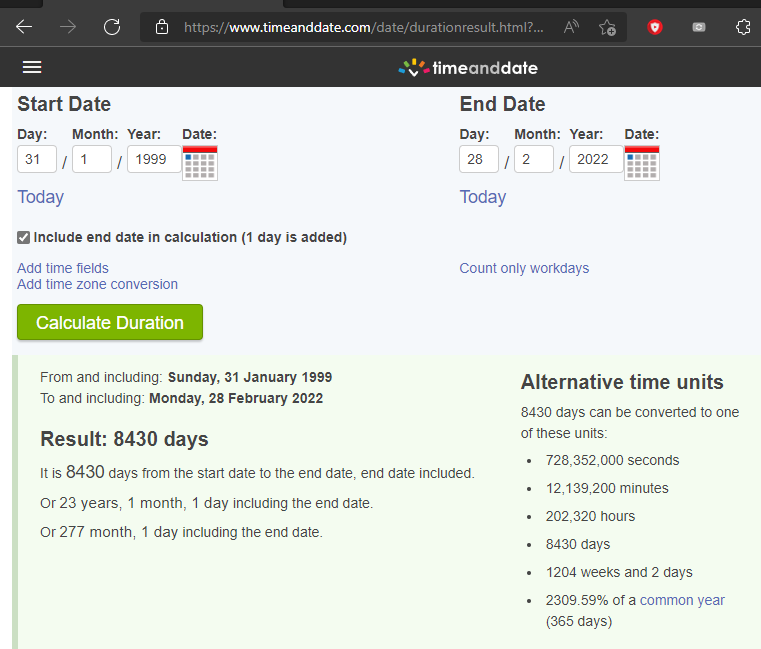

In [344]:
len(df_nap.columns)

28

In [345]:
df_nap.isnull().sum().sum()

0

## final output

In [346]:
df_nap

,ale_draught_bar_1_pint,best_back_rashers_per_kg,brandy_take_home_70cl_bottle,broccoli_per_kg,butter_per_lb,carrots_per_kg,cooked_ham_per_kg,diesel_per_ltr,ham_fillet_per_kg,irish_cheddar_per_kg,...,pork_loin_chops_per_kg,pork_sausages_per_kg,pork_steak_per_kg,potatoes_10_kg,sherry_take_home_75cl_bottle,sirloin_steak_per_kg,stout_draught_bar_1_pint,tomatoes_per_kg,vodka_take_home_70cl_bottle,whiskey_take_home_70cl_bottle
month,,,,,,,,,,,,,,,,,,,,,
1999-01-31,2.70510,7.91210,23.38070,2.41173,2.01930,0.95250,11.05789,0.67183,7.06628,7.45871,...,6.83387,3.92049,10.11682,6.99516,10.01776,10.42162,2.66192,2.36474,15.45209,17.31772
1999-02-28,2.70637,8.04164,23.39213,2.37490,2.02184,1.01473,11.11377,0.66802,7.01929,7.66699,...,6.92023,3.88620,10.05459,7.10311,10.18159,10.53465,2.66192,2.29743,15.46860,17.31645
1999-03-31,2.70891,8.05815,23.40102,2.23774,2.02057,1.02616,11.08583,0.66929,7.14502,7.46379,...,7.21741,3.89382,9.99236,7.06755,10.20953,10.41908,2.66192,2.10820,15.46098,17.31645
1999-04-30,2.73050,7.92734,23.42642,2.15773,2.02565,1.11252,11.23315,0.68834,7.04723,7.48538,...,7.18693,3.90017,9.81202,6.92150,10.24001,10.65911,2.69240,2.35077,15.42796,17.32788
1999-05-31,2.77495,8.10260,23.57628,2.12725,2.02057,1.15062,11.21918,0.70485,7.16280,7.45363,...,7.30631,3.92303,10.02411,6.83387,10.21715,10.78738,2.73558,2.13360,15.54480,17.63776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,5.00800,9.24900,32.14800,2.68800,3.10000,1.08800,17.96700,1.55800,5.65000,8.86300,...,7.54300,6.22100,7.84500,7.63800,14.04300,14.20900,4.95000,3.36400,20.49700,25.05500
2021-11-30,4.97400,9.33200,33.33800,2.71700,3.01400,1.09000,17.96400,1.61400,5.65700,8.85200,...,7.39400,6.18800,8.72500,7.63800,14.04300,14.20900,4.94800,3.36800,19.40400,22.93100
2021-12-31,4.97000,9.17300,33.26500,2.76300,3.12600,1.04800,17.99800,1.60400,5.53800,8.97800,...,7.56400,6.22100,7.40200,7.63800,14.04300,14.25800,4.94300,3.37600,18.68800,22.37900


# Feed Stuff Price

https://data.cso.ie/table/AJM04
    
https://data.cso.ie/table/AJM08    

## feed_stuff_price_1976-2018

In [347]:
df_feed_2018 = pd.read_csv("data/ie/feed_stuff_price_1976-2018.csv")

In [348]:
df_feed_2018

,Statistic,Month,Type of Feedstuff,UNIT,VALUE
0,Feed Stuff Price,1976M01,Rolled barley,Euro per Tonne,NaN
1,Feed Stuff Price,1976M01,Bran,Euro per Tonne,97.0
2,Feed Stuff Price,1976M01,Pollard,Euro per Tonne,94.0
3,Feed Stuff Price,1976M01,Soya bean meal,Euro per Tonne,NaN
4,Feed Stuff Price,1976M01,Barley meal,Euro per Tonne,103.0
...,...,...,...,...,...
15145,Feed Stuff Price,2018M01,Wheat,Euro per Tonne,222.0
15146,Feed Stuff Price,2018M01,Ewe feed coarse (16-20% protein),Euro per Tonne,283.0
15147,Feed Stuff Price,2018M01,Ewe pellets/nuts (16-20%),Euro per Tonne,311.0
15148,Feed Stuff Price,2018M01,Lamb feed (16-20% protein),Euro per Tonne,286.0


In [349]:
snake_case_columns(df_feed_2018)

In [350]:
cso_date_to_datetime(df_feed_2018, "month")

In [351]:
df_feed_2018 = df_feed_2018[df_feed_2018.month.dt.year > 1998]

In [352]:
df_feed_2018.unit.unique()

array(['Euro per Tonne'], dtype=object)

In [353]:
df_feed_2018 = df_feed_2018.pivot(index='month', columns='type_of_feedstuff', values='value')

In [354]:
df_feed_2018

type_of_feedstuff,Barley meal,Bran,Broiler finisher (19-21% protein),Broiler starter (22-24% protein),Calf meal (16-18% protein),Calf nuts and cubes (14-15% protein),Calf nuts and cubes (16-18% protein),Cattle fattening meal (13-15% protein),Cattle fattening nuts and cubes (13-15% protein),Chick mash (18-20% protein),...,Milk replacer,Pig creep (18-24% protein),Pig fattening meal (13-15% protein),Pig grower (16-18% protein),Pollard,Rolled barley,Sow breeder (14-16% protein),"Sow, weaner and 'bonham' meal (16-17.5% protein)",Soya bean meal,Wheat
month,,,,,,,,,,,,,,,,,,,,,
1999-01-31,176.0,369.0,308.0,329.0,247.0,204.0,219.0,NaN,191.0,287.0,...,1655.0,262.0,238.0,228.0,256.0,179.0,228.0,240.0,229.0,NaN
1999-02-28,181.0,369.0,303.0,323.0,241.0,203.0,222.0,NaN,190.0,284.0,...,1647.0,265.0,242.0,228.0,241.0,183.0,232.0,241.0,228.0,NaN
1999-03-31,185.0,371.0,303.0,326.0,241.0,207.0,222.0,NaN,191.0,287.0,...,1649.0,269.0,242.0,234.0,241.0,185.0,237.0,241.0,230.0,NaN
1999-04-30,186.0,371.0,302.0,323.0,241.0,203.0,221.0,NaN,192.0,288.0,...,1667.0,264.0,238.0,228.0,241.0,185.0,232.0,242.0,230.0,NaN
1999-05-31,181.0,368.0,302.0,323.0,241.0,203.0,221.0,NaN,194.0,283.0,...,1684.0,264.0,240.0,228.0,241.0,185.0,232.0,242.0,231.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-30,204.0,NaN,436.0,487.0,NaN,NaN,312.0,269.0,285.0,NaN,...,2249.0,NaN,337.0,NaN,NaN,238.0,313.0,401.0,369.0,215.0
2017-10-31,204.0,NaN,436.0,487.0,NaN,NaN,313.0,270.0,286.0,NaN,...,2249.0,NaN,337.0,NaN,NaN,241.0,313.0,401.0,368.0,215.0
2017-11-30,204.0,NaN,436.0,487.0,NaN,NaN,314.0,270.0,286.0,NaN,...,2249.0,NaN,337.0,NaN,NaN,241.0,313.0,401.0,361.0,218.0


In [355]:
df_feed_2018.columns = map(lambda x : reg_not_words.sub("",x).replace(" ", "_").replace("__", "_").lower(), df_feed_2018.columns)

In [356]:
df_feed_2018.isnull().sum()

barley_meal                                       0
bran                                             61
broiler_finisher_1921_protein                     0
broiler_starter_2224_protein                      0
calf_meal_1618_protein                           85
calf_nuts_and_cubes_1415_protein                 85
calf_nuts_and_cubes_1618_protein                  0
cattle_fattening_meal_1315_protein              144
cattle_fattening_nuts_and_cubes_1315_protein      0
chick_mash_1820_protein                          85
dairy_meal_1315_protein                         229
dairy_meal_1618_protein                           0
dairy_nuts_and_cubes_1315_protein                85
dairy_nuts_and_cubes_1618_protein                 0
ewe_feed_coarse_1620_protein                    144
ewe_pelletsnuts_1620                            144
flaked_maize                                      0
lamb_feed_1620_protein                          144
layers_mash_1416_protein                          0
maize_meal  

In [357]:
for index, value in df_feed_2018.isna().any().items():
    if value:
        print(index)
        df_feed_2018[index] = df_feed_2018[index].interpolate(method='linear')

bran
calf_meal_1618_protein
calf_nuts_and_cubes_1415_protein
cattle_fattening_meal_1315_protein
chick_mash_1820_protein
dairy_meal_1315_protein
dairy_nuts_and_cubes_1315_protein
ewe_feed_coarse_1620_protein
ewe_pelletsnuts_1620
lamb_feed_1620_protein
pig_creep_1824_protein
pig_grower_1618_protein
pollard
sow_weaner_and_bonham_meal_16175_protein
wheat


In [358]:
df_feed_2018.isnull().sum()

barley_meal                                       0
bran                                              0
broiler_finisher_1921_protein                     0
broiler_starter_2224_protein                      0
calf_meal_1618_protein                            0
calf_nuts_and_cubes_1415_protein                  0
calf_nuts_and_cubes_1618_protein                  0
cattle_fattening_meal_1315_protein              144
cattle_fattening_nuts_and_cubes_1315_protein      0
chick_mash_1820_protein                           0
dairy_meal_1315_protein                         229
dairy_meal_1618_protein                           0
dairy_nuts_and_cubes_1315_protein                 0
dairy_nuts_and_cubes_1618_protein                 0
ewe_feed_coarse_1620_protein                    144
ewe_pelletsnuts_1620                            144
flaked_maize                                      0
lamb_feed_1620_protein                          144
layers_mash_1416_protein                          0
maize_meal  

In [359]:
df_feed_2018 = df_feed_2018.dropna(axis='columns')

In [360]:
df_feed_2018.isnull().sum()

barley_meal                                     0
bran                                            0
broiler_finisher_1921_protein                   0
broiler_starter_2224_protein                    0
calf_meal_1618_protein                          0
calf_nuts_and_cubes_1415_protein                0
calf_nuts_and_cubes_1618_protein                0
cattle_fattening_nuts_and_cubes_1315_protein    0
chick_mash_1820_protein                         0
dairy_meal_1618_protein                         0
dairy_nuts_and_cubes_1315_protein               0
dairy_nuts_and_cubes_1618_protein               0
flaked_maize                                    0
layers_mash_1416_protein                        0
maize_meal                                      0
milk_replacer                                   0
pig_creep_1824_protein                          0
pig_fattening_meal_1315_protein                 0
pig_grower_1618_protein                         0
pollard                                         0


In [361]:
df_feed_2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 229 entries, 1999-01-31 to 2018-01-31
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   barley_meal                                   229 non-null    float64
 1   bran                                          229 non-null    float64
 2   broiler_finisher_1921_protein                 229 non-null    float64
 3   broiler_starter_2224_protein                  229 non-null    float64
 4   calf_meal_1618_protein                        229 non-null    float64
 5   calf_nuts_and_cubes_1415_protein              229 non-null    float64
 6   calf_nuts_and_cubes_1618_protein              229 non-null    float64
 7   cattle_fattening_nuts_and_cubes_1315_protein  229 non-null    float64
 8   chick_mash_1820_protein                       229 non-null    float64
 9   dairy_meal_1618_protein                       

### intermediarte ouput

In [362]:
df_feed_2018

,barley_meal,bran,broiler_finisher_1921_protein,broiler_starter_2224_protein,calf_meal_1618_protein,calf_nuts_and_cubes_1415_protein,calf_nuts_and_cubes_1618_protein,cattle_fattening_nuts_and_cubes_1315_protein,chick_mash_1820_protein,dairy_meal_1618_protein,...,maize_meal,milk_replacer,pig_creep_1824_protein,pig_fattening_meal_1315_protein,pig_grower_1618_protein,pollard,rolled_barley,sow_breeder_1416_protein,sow_weaner_and_bonham_meal_16175_protein,soya_bean_meal
month,,,,,,,,,,,,,,,,,,,,,
1999-01-31,176.0,369.0,308.0,329.0,247.0,204.0,219.0,191.0,287.0,192.0,...,219.0,1655.0,262.0,238.0,228.0,256.0,179.0,228.0,240.0,229.0
1999-02-28,181.0,369.0,303.0,323.0,241.0,203.0,222.0,190.0,284.0,190.0,...,229.0,1647.0,265.0,242.0,228.0,241.0,183.0,232.0,241.0,228.0
1999-03-31,185.0,371.0,303.0,326.0,241.0,207.0,222.0,191.0,287.0,195.0,...,230.0,1649.0,269.0,242.0,234.0,241.0,185.0,237.0,241.0,230.0
1999-04-30,186.0,371.0,302.0,323.0,241.0,203.0,221.0,192.0,288.0,190.0,...,229.0,1667.0,264.0,238.0,228.0,241.0,185.0,232.0,242.0,230.0
1999-05-31,181.0,368.0,302.0,323.0,241.0,203.0,221.0,194.0,283.0,190.0,...,229.0,1684.0,264.0,240.0,228.0,241.0,185.0,232.0,242.0,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-30,204.0,693.0,436.0,487.0,304.0,293.0,312.0,285.0,437.0,265.0,...,276.0,2249.0,329.0,337.0,339.0,323.0,238.0,313.0,401.0,369.0
2017-10-31,204.0,693.0,436.0,487.0,304.0,293.0,313.0,286.0,437.0,265.0,...,277.0,2249.0,329.0,337.0,339.0,323.0,241.0,313.0,401.0,368.0
2017-11-30,204.0,693.0,436.0,487.0,304.0,293.0,314.0,286.0,437.0,265.0,...,277.0,2249.0,329.0,337.0,339.0,323.0,241.0,313.0,401.0,361.0


## feed_stuff_price_2014-2022

In [363]:
df_feed_2022 = pd.read_csv("data/ie/feed_stuff_price_2014-2022.csv")

In [364]:
df_feed_2022

,Statistic,Month,Type of Feedstuff,UNIT,VALUE
0,Feed Stuff Price,2014M01,Rolled barley,Euro per Tonne,257
1,Feed Stuff Price,2014M01,Soya bean meal,Euro per Tonne,479
2,Feed Stuff Price,2014M01,Barley meal,Euro per Tonne,.
3,Feed Stuff Price,2014M01,Maize meal,Euro per Tonne,252
4,Feed Stuff Price,2014M01,Flaked maize,Euro per Tonne,369
...,...,...,...,...,...
2641,Feed Stuff Price,2022M02,Wheat,Euro per Tonne,331
2642,Feed Stuff Price,2022M02,Ewe feed coarse (16-20% protein),Euro per Tonne,368
2643,Feed Stuff Price,2022M02,Ewe pellets/nuts (16-20%),Euro per Tonne,384
2644,Feed Stuff Price,2022M02,Lamb feed (16-20% protein),Euro per Tonne,370


In [365]:
snake_case_columns(df_feed_2022)

In [366]:
cso_date_to_datetime(df_feed_2022, "month")

In [367]:
df_feed_2022 = df_feed_2022.pivot(index='month', columns='type_of_feedstuff', values='value')

In [368]:
df_feed_2022

type_of_feedstuff,Barley meal,Broiler finisher (19-21% protein),Broiler starter (22-24% protein),Calf meal (16-18% protein),Calf nuts and cubes (14-15% protein),Calf nuts and cubes (16-18% protein),Cattle fattening meal (13-15% protein),Cattle fattening nuts and cubes (13-15% protein),Chick mash (18-20% protein),Dairy meal (13-15% protein),...,Layers' mash (14-16% protein),Maize meal,Milk replacer,Pig fattening meal (13-15% protein),Pig grower (16-18% protein),Rolled barley,Sow breeder (14-16% protein),"Sow, weaner and 'bonham' meal (16-17.5% protein)",Soya bean meal,Wheat
month,,,,,,,,,,,,,,,,,,,,,
2014-01-31,.,486,539,.,.,329,296,294,.,.,...,379,252,2201,344,.,257,313,.,479,212
2014-02-28,.,500,535,.,.,329,296,294,.,.,...,378,248,2218,344,.,248,313,.,480,210
2014-03-31,.,.,.,.,.,305,281,280,.,.,...,350,244,2233,.,.,230,.,.,472,212
2014-04-30,233,479,.,.,.,313,277,283,.,.,...,.,233,2222,310,.,220,313,.,483,223
2014-05-31,227,.,.,.,.,315,282,289,.,.,...,.,240,2252,308,.,229,311,.,481,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,.,426,.,.,.,365,326,329,.,.,...,407,309,2347,.,.,275,.,.,471,291
2021-11-30,.,421,.,.,.,370,330,333,.,.,...,415,314,2376,.,.,287,.,.,469,301
2021-12-31,.,421,.,.,.,374,339,345,.,.,...,417,323,2498,.,.,302,.,.,474,313


In [369]:
df_feed_2022 = df_feed_2022.replace(".", np.nan)

In [370]:
df_feed_2022 = df_feed_2022.astype("float64")

In [371]:
df_feed_2022.columns = map(lambda x : reg_not_words.sub("",x).replace(" ", "_").replace("__", "_").lower(), df_feed_2022.columns)

In [372]:
df_feed_2022.isnull().sum()

barley_meal                                     90
broiler_finisher_1921_protein                   44
broiler_starter_2224_protein                    73
calf_meal_1618_protein                          98
calf_nuts_and_cubes_1415_protein                98
calf_nuts_and_cubes_1618_protein                 0
cattle_fattening_meal_1315_protein               0
cattle_fattening_nuts_and_cubes_1315_protein     0
chick_mash_1820_protein                         98
dairy_meal_1315_protein                         98
dairy_meal_1618_protein                          0
dairy_nuts_and_cubes_1315_protein               98
dairy_nuts_and_cubes_1618_protein                0
ewe_feed_coarse_1620_protein                     0
ewe_pelletsnuts_1620                             0
flaked_maize                                     0
lamb_feed_1620_protein                           0
layers_mash_1416_protein                        25
maize_meal                                       0
milk_replacer                  

In [373]:
for index, value in df_feed_2022.isna().any().items():
    if value:
        print(index)
        df_feed_2022[index] = df_feed_2022[index].interpolate(method='linear')

barley_meal
broiler_finisher_1921_protein
broiler_starter_2224_protein
calf_meal_1618_protein
calf_nuts_and_cubes_1415_protein
chick_mash_1820_protein
dairy_meal_1315_protein
dairy_nuts_and_cubes_1315_protein
layers_mash_1416_protein
pig_fattening_meal_1315_protein
pig_grower_1618_protein
sow_breeder_1416_protein
sow_weaner_and_bonham_meal_16175_protein


In [374]:
df_feed_2022.isnull().sum()

barley_meal                                      3
broiler_finisher_1921_protein                    0
broiler_starter_2224_protein                     0
calf_meal_1618_protein                          98
calf_nuts_and_cubes_1415_protein                98
calf_nuts_and_cubes_1618_protein                 0
cattle_fattening_meal_1315_protein               0
cattle_fattening_nuts_and_cubes_1315_protein     0
chick_mash_1820_protein                         98
dairy_meal_1315_protein                         98
dairy_meal_1618_protein                          0
dairy_nuts_and_cubes_1315_protein               98
dairy_nuts_and_cubes_1618_protein                0
ewe_feed_coarse_1620_protein                     0
ewe_pelletsnuts_1620                             0
flaked_maize                                     0
lamb_feed_1620_protein                           0
layers_mash_1416_protein                         0
maize_meal                                       0
milk_replacer                  

In [375]:
df_feed_2022 = df_feed_2022.dropna(axis="columns")

In [376]:
df_feed_2022.isnull().sum()

broiler_finisher_1921_protein                   0
broiler_starter_2224_protein                    0
calf_nuts_and_cubes_1618_protein                0
cattle_fattening_meal_1315_protein              0
cattle_fattening_nuts_and_cubes_1315_protein    0
dairy_meal_1618_protein                         0
dairy_nuts_and_cubes_1618_protein               0
ewe_feed_coarse_1620_protein                    0
ewe_pelletsnuts_1620                            0
flaked_maize                                    0
lamb_feed_1620_protein                          0
layers_mash_1416_protein                        0
maize_meal                                      0
milk_replacer                                   0
pig_fattening_meal_1315_protein                 0
rolled_barley                                   0
sow_breeder_1416_protein                        0
soya_bean_meal                                  0
wheat                                           0
dtype: int64

In [377]:
df_feed_2022.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98 entries, 2014-01-31 to 2022-02-28
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   broiler_finisher_1921_protein                 98 non-null     float64
 1   broiler_starter_2224_protein                  98 non-null     float64
 2   calf_nuts_and_cubes_1618_protein              98 non-null     float64
 3   cattle_fattening_meal_1315_protein            98 non-null     float64
 4   cattle_fattening_nuts_and_cubes_1315_protein  98 non-null     float64
 5   dairy_meal_1618_protein                       98 non-null     float64
 6   dairy_nuts_and_cubes_1618_protein             98 non-null     float64
 7   ewe_feed_coarse_1620_protein                  98 non-null     float64
 8   ewe_pelletsnuts_1620                          98 non-null     float64
 9   flaked_maize                                  9

### intermediate output

In [378]:
df_feed_2022

,broiler_finisher_1921_protein,broiler_starter_2224_protein,calf_nuts_and_cubes_1618_protein,cattle_fattening_meal_1315_protein,cattle_fattening_nuts_and_cubes_1315_protein,dairy_meal_1618_protein,dairy_nuts_and_cubes_1618_protein,ewe_feed_coarse_1620_protein,ewe_pelletsnuts_1620,flaked_maize,lamb_feed_1620_protein,layers_mash_1416_protein,maize_meal,milk_replacer,pig_fattening_meal_1315_protein,rolled_barley,sow_breeder_1416_protein,soya_bean_meal,wheat
month,,,,,,,,,,,,,,,,,,,
2014-01-31,486.000000,539.0,329.0,296.0,294.0,300.0,302.0,297.0,296.0,369.0,317.0,379.000000,252.0,2201.0,344.0,257.0,313.0,479.0,212.0
2014-02-28,500.000000,535.0,329.0,296.0,294.0,303.0,303.0,305.0,296.0,369.0,321.0,378.000000,248.0,2218.0,344.0,248.0,313.0,480.0,210.0
2014-03-31,489.500000,530.5,305.0,281.0,280.0,290.0,288.0,281.0,284.0,309.0,308.0,350.000000,244.0,2233.0,327.0,230.0,313.0,472.0,212.0
2014-04-30,479.000000,526.0,313.0,277.0,283.0,276.0,289.0,282.0,295.0,296.0,313.0,347.428571,233.0,2222.0,310.0,220.0,313.0,483.0,223.0
2014-05-31,476.666667,521.5,315.0,282.0,289.0,284.0,292.0,290.0,296.0,295.0,311.0,344.857143,240.0,2252.0,308.0,229.0,311.0,481.0,225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,426.000000,436.0,365.0,326.0,329.0,328.0,339.0,335.0,352.0,391.0,335.0,407.000000,309.0,2347.0,325.0,275.0,296.0,471.0,291.0
2021-11-30,421.000000,436.0,370.0,330.0,333.0,333.0,344.0,336.0,354.0,411.0,342.0,415.000000,314.0,2376.0,325.0,287.0,296.0,469.0,301.0
2021-12-31,421.000000,436.0,374.0,339.0,345.0,341.0,350.0,343.0,361.0,401.0,350.0,417.000000,323.0,2498.0,325.0,302.0,296.0,474.0,313.0


In [379]:
print("df_feed_2018.columns len is:", len(df_feed_2018.columns))
print("df_feed_2022.columns len is:", len(df_feed_2022.columns))

df_feed_2018.columns len is: 24
df_feed_2022.columns len is: 19


In [380]:
print("df_feed_2018 min date", " : ", df_feed_2018.index.min())
print("df_feed_2018 max date", " : ", df_feed_2018.index.max())
print("df_feed_2022 min date", " : ", df_feed_2022.index.min())
print("df_feed_2022 max date", " : ", df_feed_2022.index.max())

df_feed_2018 min date  :  1999-01-31 00:00:00
df_feed_2018 max date  :  2018-01-31 00:00:00
df_feed_2022 min date  :  2014-01-31 00:00:00
df_feed_2022 max date  :  2022-02-28 00:00:00


In [381]:
# intersection
sorted(list(set(df_feed_2018.columns) & set(df_feed_2022.columns)))

['broiler_finisher_1921_protein',
 'broiler_starter_2224_protein',
 'calf_nuts_and_cubes_1618_protein',
 'cattle_fattening_nuts_and_cubes_1315_protein',
 'dairy_meal_1618_protein',
 'dairy_nuts_and_cubes_1618_protein',
 'flaked_maize',
 'layers_mash_1416_protein',
 'maize_meal',
 'milk_replacer',
 'pig_fattening_meal_1315_protein',
 'rolled_barley',
 'sow_breeder_1416_protein',
 'soya_bean_meal']

In [382]:
df_feed_2018 = df_feed_2018[df_feed_2018.index.year < 2014]

In [383]:
df_feed_2018.index.max()

Timestamp('2013-12-31 00:00:00')

In [384]:
df_feed = pd.concat([df_feed_2018, df_feed_2022],join='inner', ignore_index=False)

In [385]:
df_feed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 278 entries, 1999-01-31 to 2022-02-28
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   broiler_finisher_1921_protein                 278 non-null    float64
 1   broiler_starter_2224_protein                  278 non-null    float64
 2   calf_nuts_and_cubes_1618_protein              278 non-null    float64
 3   cattle_fattening_nuts_and_cubes_1315_protein  278 non-null    float64
 4   dairy_meal_1618_protein                       278 non-null    float64
 5   dairy_nuts_and_cubes_1618_protein             278 non-null    float64
 6   flaked_maize                                  278 non-null    float64
 7   layers_mash_1416_protein                      278 non-null    float64
 8   maize_meal                                    278 non-null    float64
 9   milk_replacer                                 

## final output

In [386]:
df_feed

,broiler_finisher_1921_protein,broiler_starter_2224_protein,calf_nuts_and_cubes_1618_protein,cattle_fattening_nuts_and_cubes_1315_protein,dairy_meal_1618_protein,dairy_nuts_and_cubes_1618_protein,flaked_maize,layers_mash_1416_protein,maize_meal,milk_replacer,pig_fattening_meal_1315_protein,rolled_barley,sow_breeder_1416_protein,soya_bean_meal
month,,,,,,,,,,,,,,
1999-01-31,308.0,329.0,219.0,191.0,192.0,195.0,343.0,267.0,219.0,1655.0,238.0,179.0,228.0,229.0
1999-02-28,303.0,323.0,222.0,190.0,190.0,197.0,331.0,265.0,229.0,1647.0,242.0,183.0,232.0,228.0
1999-03-31,303.0,326.0,222.0,191.0,195.0,196.0,329.0,264.0,230.0,1649.0,242.0,185.0,237.0,230.0
1999-04-30,302.0,323.0,221.0,192.0,190.0,195.0,336.0,265.0,229.0,1667.0,238.0,185.0,232.0,230.0
1999-05-31,302.0,323.0,221.0,194.0,190.0,194.0,340.0,264.0,229.0,1684.0,240.0,185.0,232.0,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,426.0,436.0,365.0,329.0,328.0,339.0,391.0,407.0,309.0,2347.0,325.0,275.0,296.0,471.0
2021-11-30,421.0,436.0,370.0,333.0,333.0,344.0,411.0,415.0,314.0,2376.0,325.0,287.0,296.0,469.0
2021-12-31,421.0,436.0,374.0,345.0,341.0,350.0,401.0,417.0,323.0,2498.0,325.0,302.0,296.0,474.0


# fuel consumption

https://data.cso.ie/table/SEI06

data is yearly and mostly zeros so it won't be used

In [387]:
df_fuel_consumption = pd.read_csv("data/ie/fuel_consumption_1990-2020.csv")

In [388]:
df_fuel_consumption

,Statistic,Year,Sector,Fuel Type,UNIT,VALUE
0,Fuel Consumption (ktoe),1990,Agricultural,Sum of all coal products,ktoe,0
1,Fuel Consumption (ktoe),1990,Agricultural,Bituminous coal,ktoe,0
2,Fuel Consumption (ktoe),1990,Agricultural,Anthracite and manufactured ovoids,ktoe,0
3,Fuel Consumption (ktoe),1990,Agricultural,Coke,ktoe,0
4,Fuel Consumption (ktoe),1990,Agricultural,Lignite,ktoe,0
...,...,...,...,...,...,...
1359,Fuel Consumption (ktoe),2020,Agricultural,Non renewable waste,ktoe,0
1360,Fuel Consumption (ktoe),2020,Agricultural,Electricity,ktoe,47
1361,Fuel Consumption (ktoe),2020,Agricultural,Heat,ktoe,0
1362,Fuel Consumption (ktoe),2020,Agricultural,Sum of all fuel products,ktoe,222


In [389]:
snake_case_columns(df_fuel_consumption)

In [390]:
#cso_date_to_datetime(df_fuel_consumption, "month")

df_fuel_consumption = df_fuel_consumption.pivot(index='year', columns='fuel_type', values='value')

In [391]:
df_fuel_consumption.index = pd.to_datetime(df_fuel_consumption.index, format='%Y')

In [392]:
df_fuel_consumption.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 1990-01-01 to 2020-01-01
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Ambient Heat                        31 non-null     int64
 1   Anthracite and manufactured ovoids  31 non-null     int64
 2   Biodiesel                           31 non-null     int64
 3   Bioethanol                          31 non-null     int64
 4   Biogas                              31 non-null     int64
 5   Biomass                             31 non-null     int64
 6   Bitumen                             31 non-null     int64
 7   Bituminous coal                     31 non-null     int64
 8   Briquettes                          31 non-null     int64
 9   Coke                                31 non-null     int64
 10  Crude oil                           31 non-null     int64
 11  Electricity                         31 non-null     i

In [393]:
df_fuel_consumption = df_fuel_consumption[df_fuel_consumption.index.year > 1998]

In [394]:
df_fuel_consumption.isnull().sum()

fuel_type
Ambient Heat                          0
Anthracite and manufactured ovoids    0
Biodiesel                             0
Bioethanol                            0
Biogas                                0
Biomass                               0
Bitumen                               0
Bituminous coal                       0
Briquettes                            0
Coke                                  0
Crude oil                             0
Electricity                           0
Fuel oil                              0
Gasoil/diesel/DERV                    0
Gasoline                              0
Geothermal                            0
Heat                                  0
Hydro                                 0
Jet kerosene                          0
Kerosene                              0
LPG                                   0
Landfill gas                          0
Lignite                               0
Liquid Biofuel                        0
Lubricants                    

In [395]:
df_fuel_consumption.dropna(axis="columns")

fuel_type,Ambient Heat,Anthracite and manufactured ovoids,Biodiesel,Bioethanol,Biogas,Biomass,Bitumen,Bituminous coal,Briquettes,Coke,...,Solar,Solar Photovoltaic,Solar Thermal,Sum of all coal products,Sum of all fuel products,Sum of all peat products,Sum of all petroleum products,Sum of all renewable energies,White spirit,Wind
year,,,,,,,,,,,,,,,,,,,,,
1999-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,305,0,259,0,0,0
2000-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,317,0,268,0,0,0
2001-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,323,0,271,0,0,0
2002-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,324,0,272,0,0,0
2003-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,325,0,273,0,0,0
2004-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,314,0,262,0,0,0
2005-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,336,0,281,0,0,0
2006-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,322,0,269,0,0,0
2007-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,304,0,256,0,0,0


# COLLATE ALL DATAFRAMES TOGETHER

## merge beef and agri price index

In [396]:
df_final= pd.merge(df_beef_2, df_agri_price_indices_final, how='inner', left_index=True, right_index=True)

In [397]:
df_final.isnull().sum().sum()

0

In [398]:
df_final.shape

(278, 38)

## merge in pig prices

In [399]:
df_final= pd.merge(df_final, df_pig, how='inner', left_index=True, right_index=True)

In [400]:
df_final.isnull().sum().sum()

0

In [401]:
df_final.shape

(278, 39)

## merge in EURGBP

In [402]:
df_final= pd.merge(df_final, df_eurgbp, how='inner', left_index=True, right_index=True)

In [403]:
df_final.isnull().sum().sum()

0

In [404]:
df_final.shape

(278, 40)

## merge in EURUSD

In [405]:
df_final= pd.merge(df_final, df_eurusd, how='inner', left_index=True, right_index=True)

In [406]:
df_final.isnull().sum().sum()

0

In [407]:
df_final.shape

(278, 41)

## merge in global beef prices

In [408]:
df_final= pd.merge(df_final, df_global_beef, how='inner', left_index=True, right_index=True)

In [409]:
df_final.isnull().sum().sum()

0

In [410]:
df_final.shape

(278, 42)

## merge in sunshine

In [411]:
df_final= pd.merge(df_final, df_sunshine, how='inner', left_index=True, right_index=True)

In [412]:
df_final.isnull().sum().sum()

0

In [413]:
df_final.shape

(278, 43)

## merge in rain

In [414]:
df_final= pd.merge(df_final, df_rain, how='inner', left_index=True, right_index=True)

In [415]:
df_final.isnull().sum().sum()

0

In [416]:
df_final.shape

(278, 44)

## merge in temperature

In [417]:
df_final= pd.merge(df_final, df_temp, how='inner', left_index=True, right_index=True)

In [418]:
df_final.isnull().sum().sum()

0

In [419]:
df_final.shape

(278, 45)

## merge in fuel

In [420]:
df_final= pd.merge(df_final, df_fuel, how='inner', left_index=True, right_index=True)

In [421]:
df_final.isnull().sum().sum()

0

In [422]:
df_final.shape

(278, 47)

## merge in brent

In [423]:
df_final= pd.merge(df_final, df_brent, how='inner', left_index=True, right_index=True)

In [424]:
df_final.isnull().sum().sum()

0

In [425]:
df_final.shape

(278, 48)

## merge in crude

In [426]:
df_final= pd.merge(df_final, df_crude, how='inner', left_index=True, right_index=True)

In [427]:
df_final.isnull().sum().sum()

0

In [428]:
df_final.shape

(278, 49)

## merge in consumer price index

In [429]:
df_final= pd.merge(df_final, df_cpi, how='inner', left_index=True, right_index=True)

In [430]:
df_final.isnull().sum().sum()

0

In [431]:
df_final.shape

(278, 51)

## merge in national average prices

In [432]:
df_final= pd.merge(df_final, df_nap, how='inner', left_index=True, right_index=True)

In [433]:
df_final.isnull().sum().sum()

0

In [434]:
df_final.shape

(278, 79)